In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
!pip install seaborn -q

In [3]:
!pip install matplotlib -q

In [4]:
data = pd.read_csv('/content/train-chennai-sale.csv')
data

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [5]:
data.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

## **PREPROCESSING & CLEANING DATA**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [7]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [8]:
data.shape[0] - len(data['PRT_ID'].unique())

0

In [9]:
del data['PRT_ID']

## **AREA**

In [10]:
Area = data['AREA'].unique()

Area

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [11]:
len(data['AREA'].unique())

17

In [12]:
import re

AreaString = ' '.join(Area)

Kar = re.findall(r'Ka\w+', AreaString)
print('Starts with K:', Kar)

Starts with K: ['Karapakkam', 'Karapakam']


In [13]:
data['AREA'] = data['AREA'].replace('Karapakam', 'Karapakkam')

In [14]:
Anna = re.findall(r'\bAn\w+', AreaString)
print('Anna Nagar:', Anna)

Anna Nagar: ['Anna', 'Ana', 'Ann']


In [15]:
data['AREA'] = data['AREA'].replace('Ana Nagar', 'Anna Nagar')
data['AREA'] = data['AREA'].replace('Ann Nagar', 'Anna Nagar')

In [16]:
Ad = re.findall(r'Ad\w+', AreaString)
print('Starts with Ad:', Ad)

Starts with Ad: ['Adyar', 'Adyr']


In [17]:
data['AREA'] = data['AREA'].replace('Adyr', 'Adyar')

In [18]:
Ve = re.findall(r'Ve\w+', AreaString)
print('Starts with Ve:', Ve)

Starts with Ve: ['Velachery', 'Velchery']


In [19]:
data['AREA'] = data['AREA'].replace('Velchery', 'Velachery')

In [20]:
Ch = re.findall(r'Ch\w+', AreaString)
print('Starts with Ch:', Ch)

Starts with Ch: ['Chrompet', 'Chrompt', 'Chrmpet', 'Chormpet']


In [21]:
data['AREA'] = data['AREA'].replace('Chrompt', 'Chrompet')
data['AREA'] = data['AREA'].replace('Chrmpet', 'Chrompet')
data['AREA'] = data['AREA'].replace('Chormpet', 'Chrompet')

In [22]:
data['AREA'] = data['AREA'].replace('KKNagar', 'KK Nagar')

In [23]:
data['AREA'] = data['AREA'].replace('TNagar', 'T Nagar')

In [24]:
data['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

Text(0.5, 1.0, 'Area vs Number of Buildings')

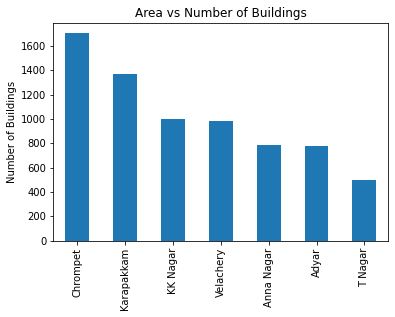

In [25]:
data['AREA'].value_counts().plot(kind = 'bar')
plt.ylabel('Number of Buildings')
plt.title('Area vs Number of Buildings')

## **INT_SQFT**

In [26]:
data['INT_SQFT'].describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

Text(0.5, 1.0, 'Area vs Average sqft')

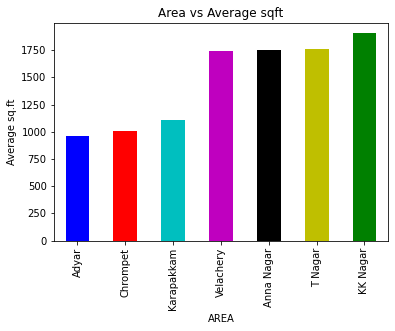

In [27]:
color = ['b', 'r', 'c', 'm', 'k', 'y', 'g']
data.groupby('AREA')['INT_SQFT'].mean().sort_values().plot(kind='bar', color = color)
plt.ylabel('Average sq.ft')
plt.title('Area vs Average sqft')

## **DATE SALE**

In [28]:
data['DATE_SALE'].describe()

count           7109
unique          2798
top       06-10-2009
freq              12
Name: DATE_SALE, dtype: object

In [29]:
data['DATE_SALE'].head()

0    04-05-2011
1    19-12-2006
2    04-02-2012
3    13-03-2010
4    05-10-2009
Name: DATE_SALE, dtype: object

In [30]:
import datetime

data['DATE_SALE'] = pd.to_datetime(data['DATE_SALE'], format = '%d-%m-%Y')

In [31]:
data['DATE_SALE'].head()

0   2011-05-04
1   2006-12-19
2   2012-02-04
3   2010-03-13
4   2009-10-05
Name: DATE_SALE, dtype: datetime64[ns]

In [32]:
data['DATE_SALE'].value_counts().head()

2009-10-06    12
2009-01-06    10
2011-04-12    10
2012-02-26    10
2010-11-17    10
Name: DATE_SALE, dtype: int64

In [33]:
data['DATE_SALE'].dt.year.value_counts()

2010    1341
2011    1300
2009    1122
2008     814
2012     654
2007     651
2013     365
2014     335
2006     253
2004     116
2005     107
2015      51
Name: DATE_SALE, dtype: int64

Text(0.5, 1.0, 'Year vs Sales')

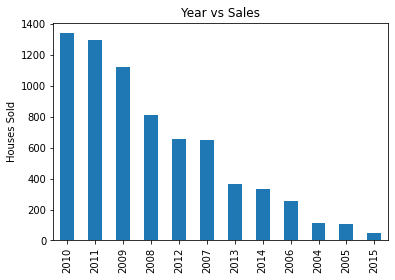

In [34]:
data['DATE_SALE'].dt.year.value_counts().plot(kind = 'bar')
plt.ylabel('Houses Sold')
plt.title('Year vs Sales')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Month vs Sales')

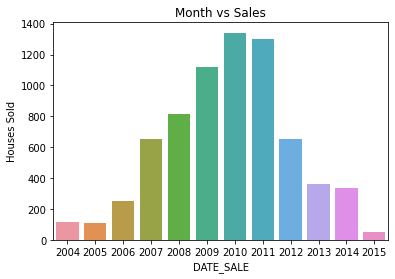

In [35]:
sns.countplot(data['DATE_SALE'].dt.year)
plt.ylabel('Houses Sold')
plt.title('Month vs Sales')

In [36]:
data['DATE_SALE'].dt.month.value_counts()

1     670
10    653
12    621
3     607
2     594
5     588
8     583
11    582
9     568
4     562
7     560
6     521
Name: DATE_SALE, dtype: int64

Text(0.5, 1.0, 'Month vs Sales')

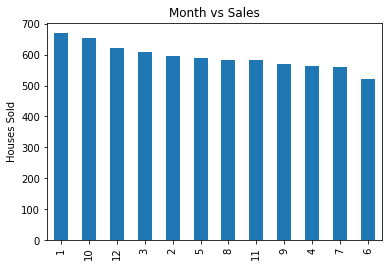

In [37]:
data['DATE_SALE'].dt.month.value_counts().plot(kind = 'bar')
plt.ylabel('Houses Sold')
plt.title('Month vs Sales')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Month vs Sales')

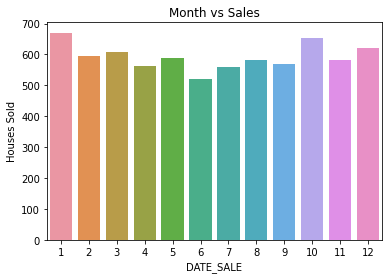

In [38]:
sns.countplot(data['DATE_SALE'].dt.month)
plt.ylabel('Houses Sold')
plt.title('Month vs Sales')

## **Distance from Main Road**

In [39]:
data['DIST_MAINROAD'].describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

In [40]:
data.groupby('AREA')['DIST_MAINROAD'].mean()

AREA
Adyar         101.332041
Anna Nagar    100.661168
Chrompet       98.133373
KK Nagar      100.700100
Karapakkam    101.028551
T Nagar       103.516966
Velachery      94.840979
Name: DIST_MAINROAD, dtype: float64

## **Number of Bedrooms, Bathrooms, Rooms**

In [41]:
data[['N_BEDROOM', 'N_BATHROOM', 'N_ROOM']].describe()

,N_BEDROOM,N_BATHROOM,N_ROOM
count,7108.000000,7104.000000,7109.000000
mean,1.637029,1.213260,3.688704
std,0.802902,0.409639,1.019099
min,1.000000,1.000000,2.000000
25%,1.000000,1.000000,3.000000
50%,1.000000,1.000000,4.000000
75%,2.000000,1.000000,4.000000
max,4.000000,2.000000,6.000000


In [42]:
data[['N_BEDROOM', 'N_BATHROOM', 'N_ROOM']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   N_BEDROOM   7108 non-null   float64
 1   N_BATHROOM  7104 non-null   float64
 2   N_ROOM      7109 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 166.7 KB


In [43]:
mod_bed = data['N_BEDROOM'].mode()
mod_bath = data['N_BATHROOM'].mode()
print('Mode of N_BEDROOM :', data['N_BEDROOM'].mode())
print('Mode of N_BATHROOM :',data['N_BATHROOM'].mode())

Mode of N_BEDROOM : 0    1.0
dtype: float64
Mode of N_BATHROOM : 0    1.0
dtype: float64


In [44]:
data['N_BEDROOM'].fillna(1, inplace = True)
data['N_BATHROOM'].fillna(1, inplace = True)

In [45]:
data['N_BEDROOM'] = data['N_BEDROOM'].astype(int) 
data['N_BATHROOM'] = data['N_BATHROOM'].astype(int) 

In [46]:
data[['N_BEDROOM', 'N_BATHROOM', 'N_ROOM']].describe()

,N_BEDROOM,N_BATHROOM,N_ROOM
count,7109.000000,7109.000000,7109.000000
mean,1.636939,1.213110,3.688704
std,0.802881,0.409534,1.019099
min,1.000000,1.000000,2.000000
25%,1.000000,1.000000,3.000000
50%,1.000000,1.000000,4.000000
75%,2.000000,1.000000,4.000000
max,4.000000,2.000000,6.000000


In [47]:
data.groupby('AREA')[['N_BEDROOM', 'N_BATHROOM', 'N_ROOM']].mean()

,N_BEDROOM,N_BATHROOM,N_ROOM
AREA,,,
Adyar,1.170543,1.170543,2.895349
Anna Nagar,1.398477,1.000000,4.398477
Chrompet,1.165100,1.000000,3.002938
KK Nagar,2.811434,1.595787,4.811434
Karapakkam,1.308931,1.308931,2.992679
T Nagar,1.449102,1.000000,4.449102
Velachery,2.374108,1.374108,4.374108


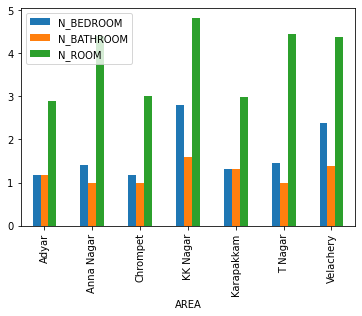

In [48]:
data.groupby('AREA')[['N_BEDROOM', 'N_BATHROOM', 'N_ROOM']].mean().plot(kind='bar')

In [49]:
data.groupby('AREA')['N_ROOM'].mean().sort_values(ascending=False)

AREA
KK Nagar      4.811434
T Nagar       4.449102
Anna Nagar    4.398477
Velachery     4.374108
Chrompet      3.002938
Karapakkam    2.992679
Adyar         2.895349
Name: N_ROOM, dtype: float64

Text(0.5, 1.0, 'Area vs Number of Rooms')

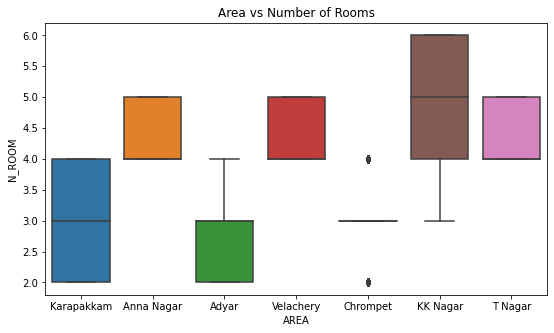

In [50]:
plt.figure(figsize = (9, 5))
sns.boxplot(x='AREA', y='N_ROOM', data=data)
plt.title('Area vs Number of Rooms')

Text(0.5, 1.0, 'Area vs N_Rooms')

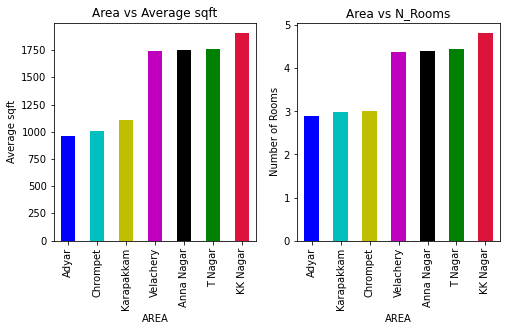

In [51]:
plt.figure(figsize = (8, 4))

color = ['b', 'c', 'y', 'm', 'k', 'g', '#DC143C']

plt.subplot(1,2,1)
data.groupby('AREA')['INT_SQFT'].mean().sort_values().plot(kind = 'bar', color = color)
plt.ylabel('Average sqft')
plt.title('Area vs Average sqft')

plt.subplot(1,2,2)
data.groupby('AREA')['N_ROOM'].mean().sort_values().plot(kind = 'bar', color = color)
plt.ylabel('Number of Rooms')
plt.title('Area vs N_Rooms')

<Figure size 1440x576 with 0 Axes>

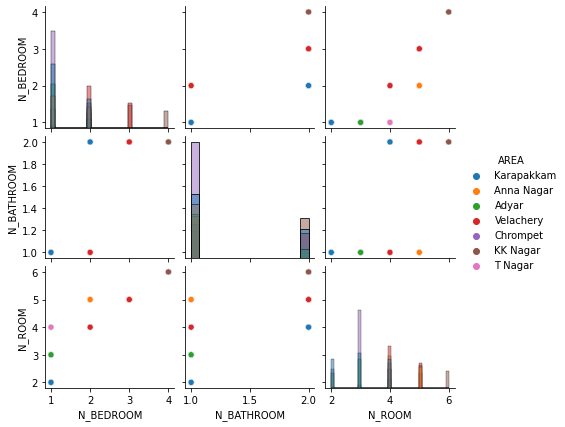

<Figure size 1440x576 with 0 Axes>

In [52]:
sns.pairplot(data=data,
             vars = ["N_BEDROOM", "N_BATHROOM", "N_ROOM"], 
             kind="scatter",                        
             diag_kind="hist",                     
             hue="AREA",                           
             height=2,
             aspect=1.1
             )

plt.figure(figsize = (20,8))

## **Sale Condition**

In [53]:
data.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [54]:
data['SALE_COND'].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [55]:
data['SALE_COND'] = data['SALE_COND'].replace('Adj Land', 'AdjLand')
data['SALE_COND'] = data['SALE_COND'].replace('Ab Normal', 'AbNormal')
data['SALE_COND'] = data['SALE_COND'].replace('Partiall', 'Partial')
data['SALE_COND'] = data['SALE_COND'].replace('PartiaLl', 'Partial')

data['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

Text(0.5, 1.0, 'Sale Condition vs Number of Sales')

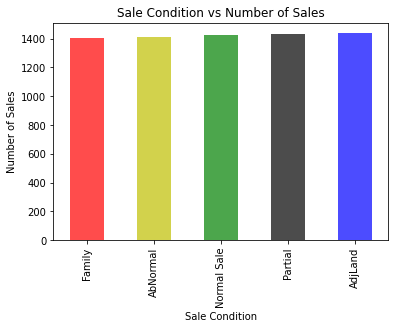

In [56]:
c = ['r', 'y', 'g', 'k', 'b']
data['SALE_COND'].value_counts().sort_values().plot(kind = 'bar', color = c, alpha = 0.7)
plt.ylabel('Number of Sales')
plt.xlabel('Sale Condition')
plt.title('Sale Condition vs Number of Sales')

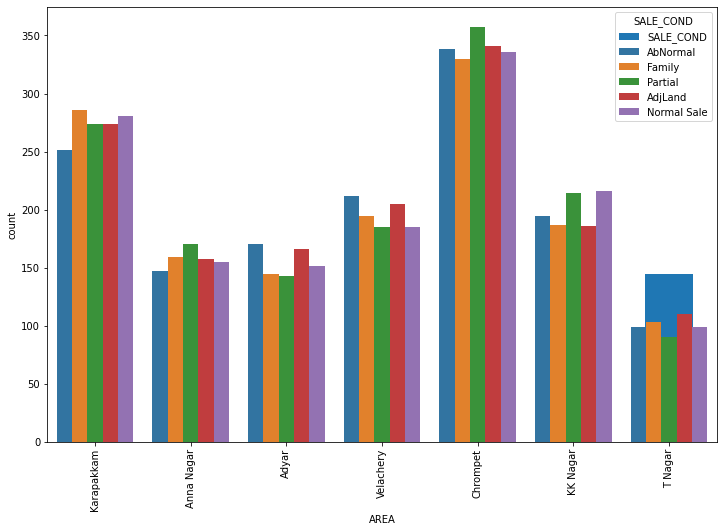

In [57]:
plt.figure(figsize = (12,8))
data.groupby('AREA')['SALE_COND'].value_counts().sort_values().plot(kind = 'bar')

sns.countplot(data = data, x='AREA', hue = 'SALE_COND')

## **Parking Lot**

In [58]:
data['PARK_FACIL'].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [59]:
data['PARK_FACIL'] = data['PARK_FACIL'].replace('Noo', 'No')

In [60]:
data['PARK_FACIL'].describe()

count     7109
unique       2
top        Yes
freq      3587
Name: PARK_FACIL, dtype: object

In [61]:
data['PARK_FACIL'].isna().sum()

0

In [62]:
data.groupby('AREA')['PARK_FACIL'].value_counts()

AREA        PARK_FACIL
Adyar       Yes           391
            No            383
Anna Nagar  Yes           396
            No            392
Chrompet    Yes           863
            No            839
KK Nagar    No            513
            Yes           484
Karapakkam  No            693
            Yes           673
T Nagar     Yes           263
            No            238
Velachery   Yes           517
            No            464
Name: PARK_FACIL, dtype: int64

NameError: ignored

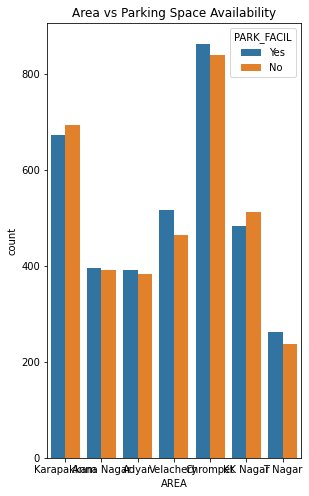

In [63]:
plt.figure(figsize = (10, 8))
plt.subplot(1,2,1)
sns.countplot(data = data, x='AREA', hue = 'PARK_FACIL')
plt.title('Area vs Parking Space Availability')
sns.catplot(x="class", hue="who", col="survived",data=titanic, kind="count", height=4, aspect=.7)

## **Date Build**

In [64]:
data['DATE_BUILD'].head()

0    15-05-1967
1    22-12-1995
2    09-02-1992
3    18-03-1988
4    13-10-1979
Name: DATE_BUILD, dtype: object

In [65]:
data['DATE_BUILD'] = pd.to_datetime(data['DATE_BUILD'], format = '%d-%m-%Y')
data['DATE_BUILD'].head()

0   1967-05-15
1   1995-12-22
2   1992-02-09
3   1988-03-18
4   1979-10-13
Name: DATE_BUILD, dtype: datetime64[ns]

In [66]:

data['DATE_BUILD'].dt.year.value_counts()


1985    200
1988    197
2002    194
1990    191
1999    189
       ... 
1954     11
2010      9
1951      6
1949      2
1950      2
Name: DATE_BUILD, Length: 62, dtype: int64

## **Age of House / Building - Derived Column**

In [67]:
data['AGE_OF_BUILD'] = data['DATE_SALE'].dt.year - data['DATE_BUILD'].dt.year
data['AGE_OF_BUILD']

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: AGE_OF_BUILD, Length: 7109, dtype: int64

Text(0.5, 1.0, 'Area vs Mean Age of Buildings')

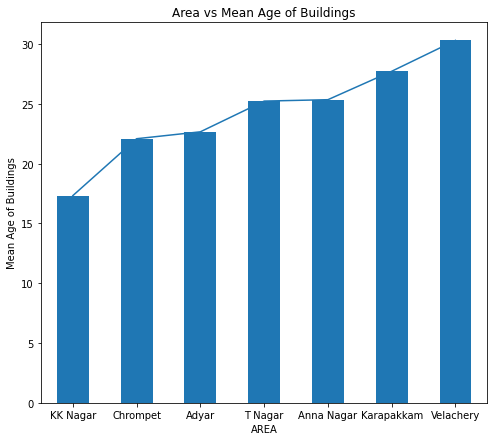

In [68]:
plt.figure(figsize = (8, 7))
data.groupby('AREA')['AGE_OF_BUILD'].mean().sort_values().plot(kind = 'bar')
data.groupby('AREA')['AGE_OF_BUILD'].mean().sort_values().plot(kind = 'line')
plt.ylabel('Mean Age of Buildings')
plt.title('Area vs Mean Age of Buildings')

## **Build Type**

In [69]:
data['BUILDTYPE'].describe()

count      7109
unique        5
top       House
freq       2444
Name: BUILDTYPE, dtype: object

In [70]:
data['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [71]:
data['BUILDTYPE'] = data['BUILDTYPE'].replace('Comercial', 'Commercial')
data['BUILDTYPE'] = data['BUILDTYPE'].replace('Other', 'Others')

In [72]:
data['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [73]:
pd.crosstab(index=data['AREA'], columns=data['BUILDTYPE'])

BUILDTYPE,Commercial,House,Others
AREA,,,
Adyar,247,263,264
Anna Nagar,252,276,260
Chrompet,562,591,549
KK Nagar,322,348,327
Karapakkam,433,486,447
T Nagar,178,156,167
Velachery,335,324,322


Text(0.5, 1.0, 'Area vs Type of Buildings')

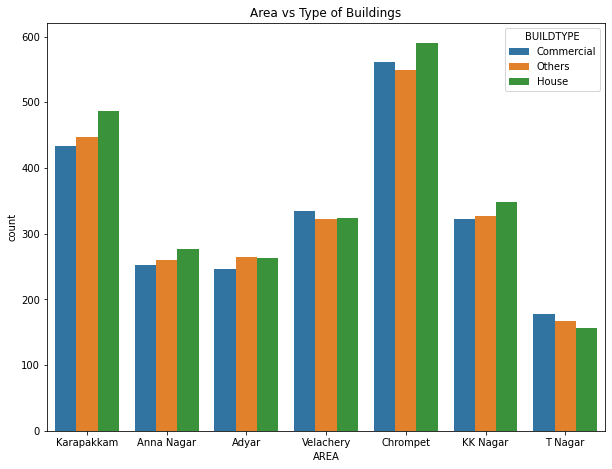

In [74]:
plt.figure(figsize = (10,7.5))
sns.countplot(data = data, x = 'AREA', hue = 'BUILDTYPE') 
plt.title('Area vs Type of Buildings')

## **Utility Available**

In [75]:
data['UTILITY_AVAIL'].describe()

count       7109
unique         5
top       AllPub
freq        1886
Name: UTILITY_AVAIL, dtype: object

In [76]:
data['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [77]:
data['UTILITY_AVAIL'].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [78]:
data['UTILITY_AVAIL'] = data['UTILITY_AVAIL'].replace({'All Pub':'AllPub', 'NoSewr ': 'NoSewr'})

In [79]:
pd.crosstab(index=data['AREA'], columns=data['UTILITY_AVAIL'])

UTILITY_AVAIL,AllPub,ELO,NoSeWa,NoSewr
AREA,,,,
Adyar,189,218,199,168
Anna Nagar,212,204,187,185
Chrompet,430,404,426,442
KK Nagar,329,0,344,324
Karapakkam,349,321,345,351
T Nagar,125,118,131,127
Velachery,253,257,239,232


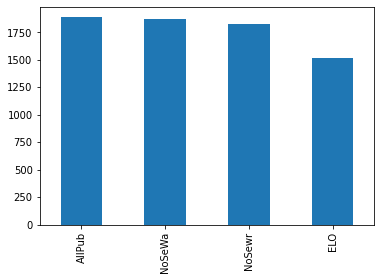

In [80]:
data['UTILITY_AVAIL'].value_counts().plot(kind='bar')

## **Street**

In [81]:
data['STREET'].describe()

count      7109
unique        5
top       Paved
freq       2560
Name: STREET, dtype: object

In [82]:
data['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [83]:
data['STREET'].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [84]:
data['STREET'] = data['STREET'].replace('Pavd', 'Paved')
data['STREET'] = data['STREET'].replace('NoAccess', 'No Access')

In [85]:
data['STREET'].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [86]:
pd.crosstab(index=data['AREA'], columns=data['STREET'])

STREET,Gravel,No Access,Paved
AREA,,,
Adyar,256,255,263
Anna Nagar,271,271,246
Chrompet,584,553,565
KK Nagar,479,0,518
Karapakkam,444,467,455
T Nagar,161,161,179
Velachery,325,310,346


Text(0.5, 1.0, 'Area vs Type of Road (Accessibility)')

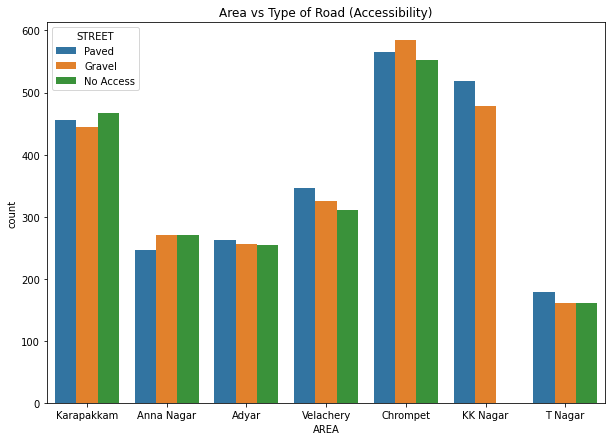

In [87]:
plt.figure(figsize = (10, 7))
sns.countplot(data = data, x = 'AREA', hue = 'STREET')
plt.title('Area vs Type of Road (Accessibility)')

In [88]:
pd.crosstab(index=data['AREA'], columns=data['BUILDTYPE'])

BUILDTYPE,Commercial,House,Others
AREA,,,
Adyar,247,263,264
Anna Nagar,252,276,260
Chrompet,562,591,549
KK Nagar,322,348,327
Karapakkam,433,486,447
T Nagar,178,156,167
Velachery,335,324,322


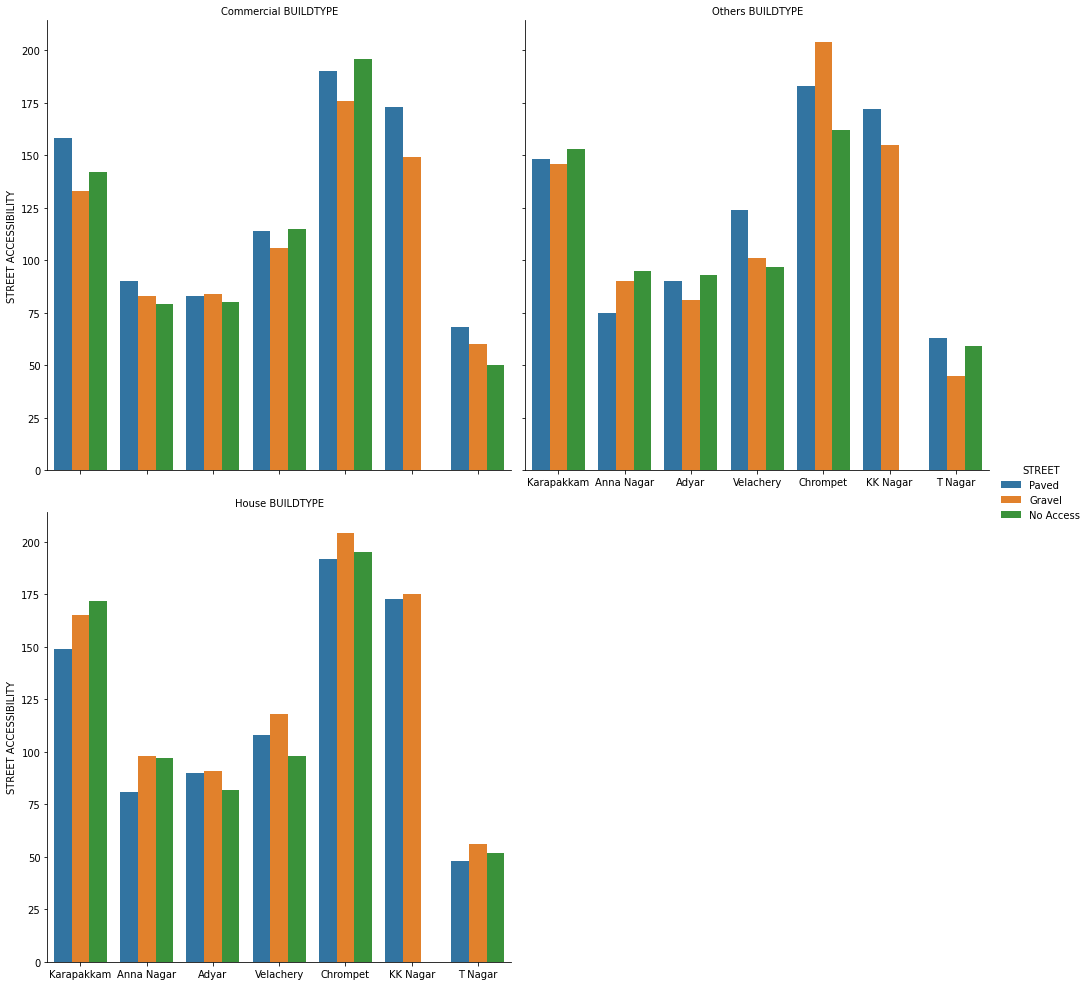

In [89]:
g = sns.catplot(x="AREA", hue="STREET", col="BUILDTYPE", data=data, 
                kind="count", col_wrap=2, height=7)

(g.set_axis_labels("", "STREET ACCESSIBILITY")
  .set_titles("{col_name} {col_var}")
)  

## **MzZone**

In [90]:
data['MZZONE'].describe()

count     7109
unique       6
top         RL
freq      1858
Name: MZZONE, dtype: object

In [91]:
data['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [92]:
data['MZZONE'].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [93]:
pd.crosstab(index=data['AREA'], columns=data['MZZONE'])

MZZONE,A,C,I,RH,RL,RM
AREA,,,,,,
Adyar,136,146,131,122,126,113
Anna Nagar,0,0,0,259,266,263
Chrompet,0,0,0,559,579,564
KK Nagar,0,0,0,326,336,335
Karapakkam,235,238,239,232,213,209
T Nagar,0,0,0,153,173,175
Velachery,166,166,155,171,165,158


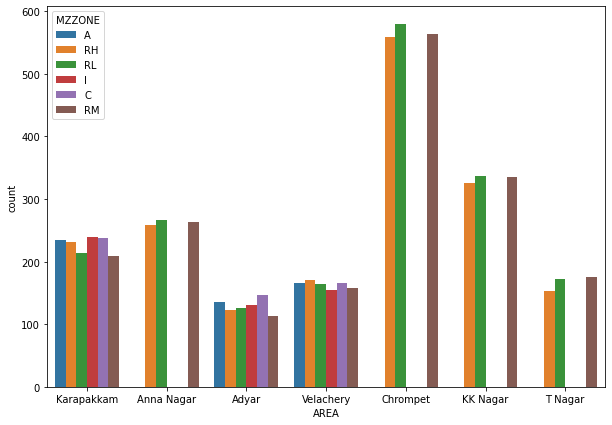

In [94]:
plt.figure(figsize = (10,7))
sns.countplot(data = data, x = 'AREA', hue = 'MZZONE')

## **QS_Rooms, QS_Bathroom, QS_Bedroom, QS_Overall**

In [95]:
data.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'AGE_OF_BUILD'],
      dtype='object')

In [96]:
data[['QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL']].describe()

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
count,7109.000000,7109.000000,7109.000000,7061.000000
mean,3.517471,3.507244,3.485300,3.503254
std,0.891972,0.897834,0.887266,0.527223
min,2.000000,2.000000,2.000000,2.000000
25%,2.700000,2.700000,2.700000,3.130000
50%,3.500000,3.500000,3.500000,3.500000
75%,4.300000,4.300000,4.300000,3.890000
max,5.000000,5.000000,5.000000,4.970000


In [97]:
data['QS_OVERALL'].isna().sum()

48

In [98]:
data['QS_OVERALL'] = data['QS_OVERALL'].fillna(3.5)

In [99]:
data['QS_OVERALL'].isna().sum()

0

In [100]:
data[['QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL']].describe()

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
count,7109.000000,7109.000000,7109.000000,7109.000000
mean,3.517471,3.507244,3.485300,3.503232
std,0.891972,0.897834,0.887266,0.525440
min,2.000000,2.000000,2.000000,2.000000
25%,2.700000,2.700000,2.700000,3.130000
50%,3.500000,3.500000,3.500000,3.500000
75%,4.300000,4.300000,4.300000,3.880000
max,5.000000,5.000000,5.000000,4.970000


## **Registration Fees, Commission**

In [101]:
data.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'AGE_OF_BUILD'],
      dtype='object')

In [102]:
data[['REG_FEE', 'COMMIS']].describe()

,REG_FEE,COMMIS
count,7109.000000,7109.000000
mean,376938.330708,141005.726544
std,143070.662010,78768.093718
min,71177.000000,5055.000000
25%,272406.000000,84219.000000
50%,349486.000000,127628.000000
75%,451562.000000,184506.000000
max,983922.000000,495405.000000


In [103]:
del data['REG_FEE']
del data['COMMIS']

## **SALES PRICE : TARGET (DEPENDENT VARIABLE)**

In [104]:
data['SALES_PRICE'].describe()

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

In [105]:
# Outliers:

Q3, Q1 = np.percentile(data['SALES_PRICE'], [75,25])

IQR = Q3 - Q1
print(IQR)

# Upper Limit and Lower Limit Threshold
UL = Q3 + (1.5 * IQR)
LL = Q1 - (1.5 * IQR)

print('UL :', UL, ' LL :', LL)

data.loc[ data['SALES_PRICE']>UL, : ]

4721800.0
UL : 20076600.0  LL : 1189400.0


,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_OF_BUILD
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
19,Anna Nagar,1902,2012-07-02,168,2,1,5,Family,Yes,1970-07-13,Commercial,ELO,Paved,RL,4.5,4.9,4.9,4.760,21203240,42
47,Anna Nagar,1710,2009-11-12,15,1,1,4,Normal Sale,Yes,1998-11-15,Commercial,AllPub,Gravel,RH,2.7,4.0,2.2,2.825,20215970,11
125,T Nagar,1973,2007-01-29,63,2,1,5,Family,Yes,1972-02-07,Commercial,AllPub,Gravel,RM,2.6,2.9,4.9,3.710,23307000,35
168,T Nagar,1926,2007-05-27,193,2,1,5,AdjLand,Yes,1990-05-31,Commercial,NoSewr,No Access,RM,4.2,4.9,3.1,3.880,22630540,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,T Nagar,1901,2007-12-31,83,2,1,5,Normal Sale,Yes,2003-01-01,Commercial,ELO,Paved,RM,4.9,2.2,2.6,3.190,22629400,4
7008,T Nagar,1810,2014-06-06,109,2,1,5,AdjLand,Yes,2000-06-09,Commercial,NoSewr,No Access,RM,2.6,2.2,2.5,2.455,21556330,14
7024,Anna Nagar,1703,2007-04-16,164,1,1,4,AdjLand,Yes,2002-04-17,Commercial,AllPub,Paved,RL,2.7,3.6,3.5,3.245,20782250,5
7058,T Nagar,1858,2009-02-27,36,2,1,5,Normal Sale,Yes,1974-03-08,Commercial,ELO,No Access,RM,2.0,4.7,4.9,3.980,21185700,35


In [106]:
data.loc[ data['SALES_PRICE']<LL, : ]

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_OF_BUILD


## **Exploratory Data Analysis (EDA)**

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7109 non-null   int64         
 5   N_BATHROOM     7109 non-null   int64         
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

In [108]:
data.isna().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
AGE_OF_BUILD     0
dtype: int64

In [109]:
del data['DATE_SALE']
del data['DATE_BUILD']

In [110]:
data_cat = data.select_dtypes(include = 'object')
data_cat = data_cat.columns.tolist()
print('Categorical :', data_cat, '\n')

data_num = data.select_dtypes(exclude= 'object')
data_num = data_num.columns.tolist()
print('Numerical :', data_num)

data_num.remove('SALES_PRICE')
print('Numerical :', data_num)

Categorical : ['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE'] 

Numerical : ['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE', 'AGE_OF_BUILD']
Numerical : ['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'AGE_OF_BUILD']


In [111]:
from scipy.stats import skew

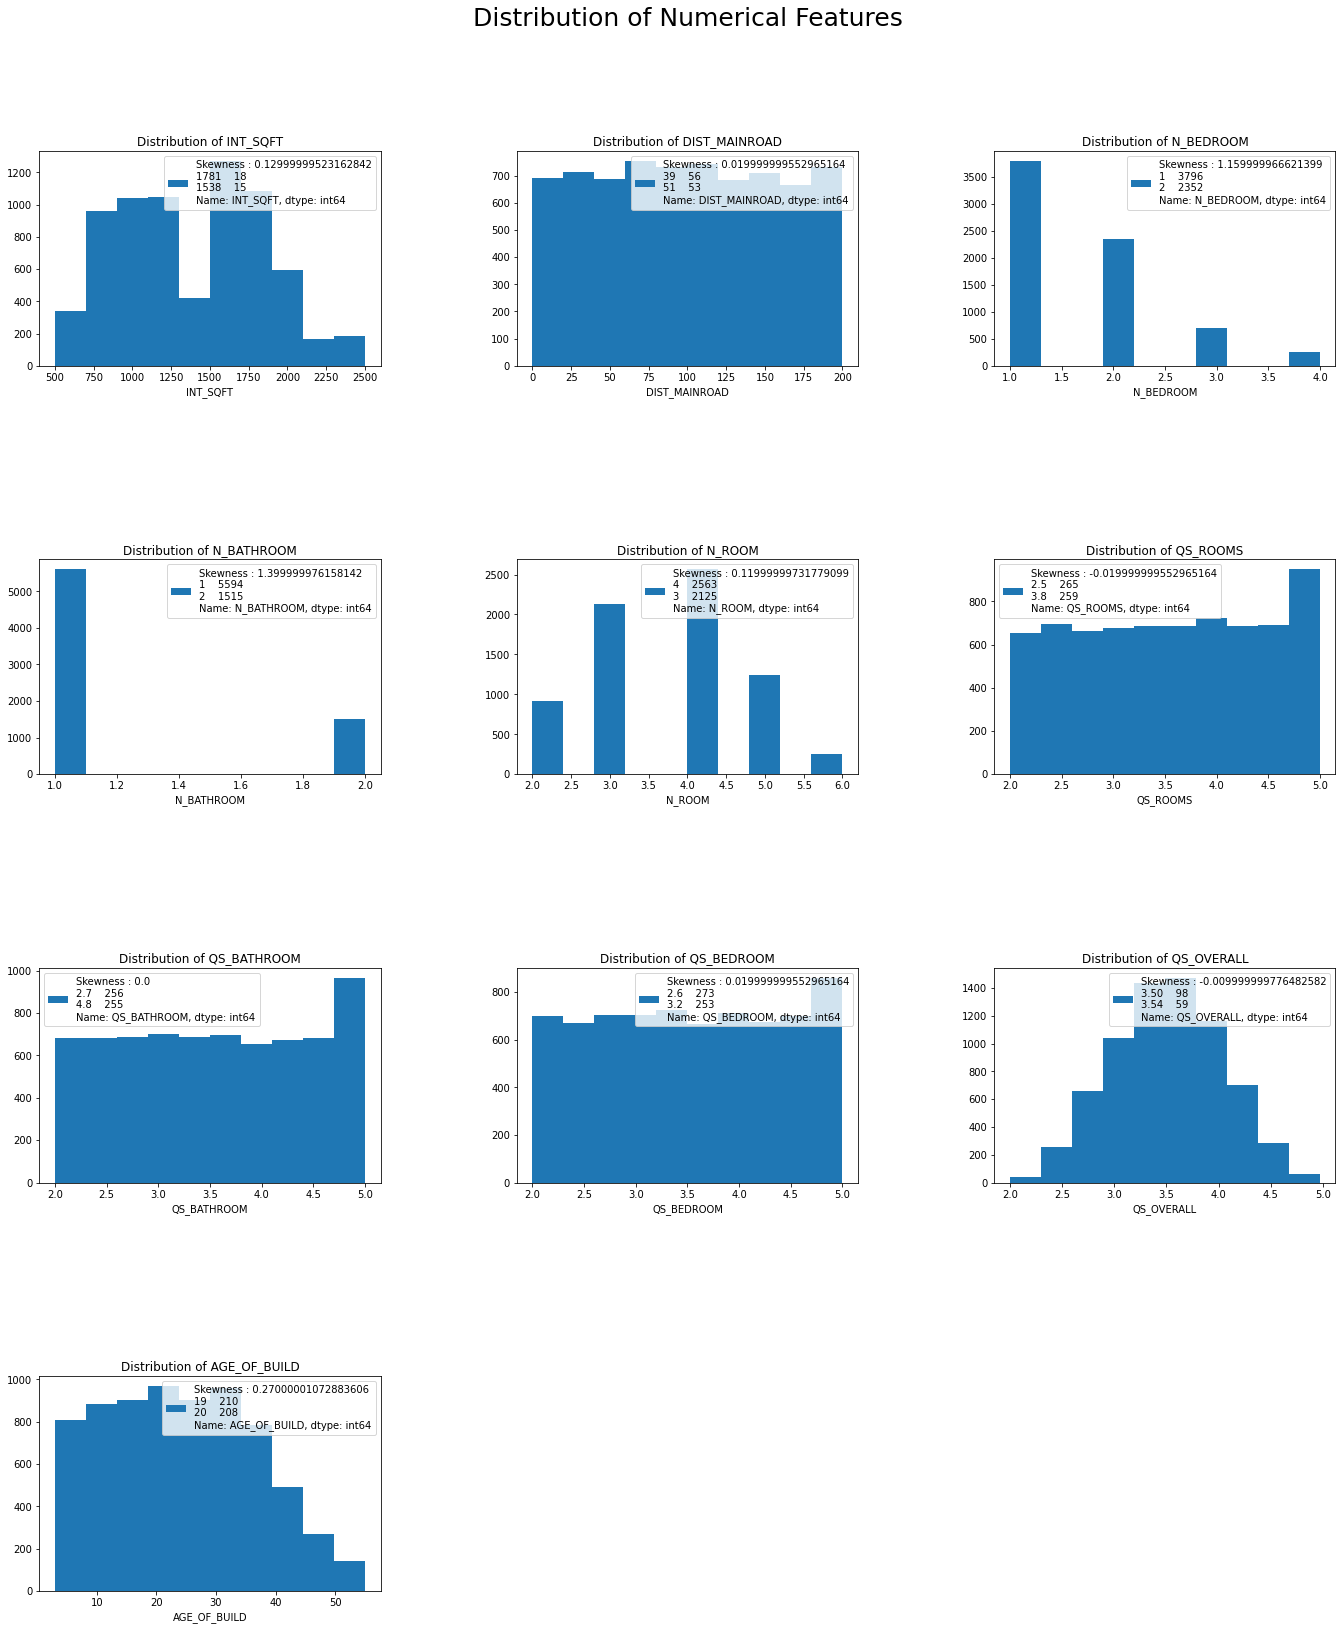

In [112]:
j = 0
plt.figure(figsize = (22.5,25))
plt.suptitle('Distribution of Numerical Features', fontsize=25)

for i in data_num:
  plt.subplot(4,3,j+1)
  skew = data[i].skew(axis=0).astype(np.float32).round(2)
  plt.hist(data[i], label = 'Skewness : {}\n{}'.format(skew,data[i].value_counts().head(2)))
  plt.xlabel(i)
  plt.legend()
  plt.title('Distribution of {}'.format(i))
  j += 1

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.9)
plt.show()

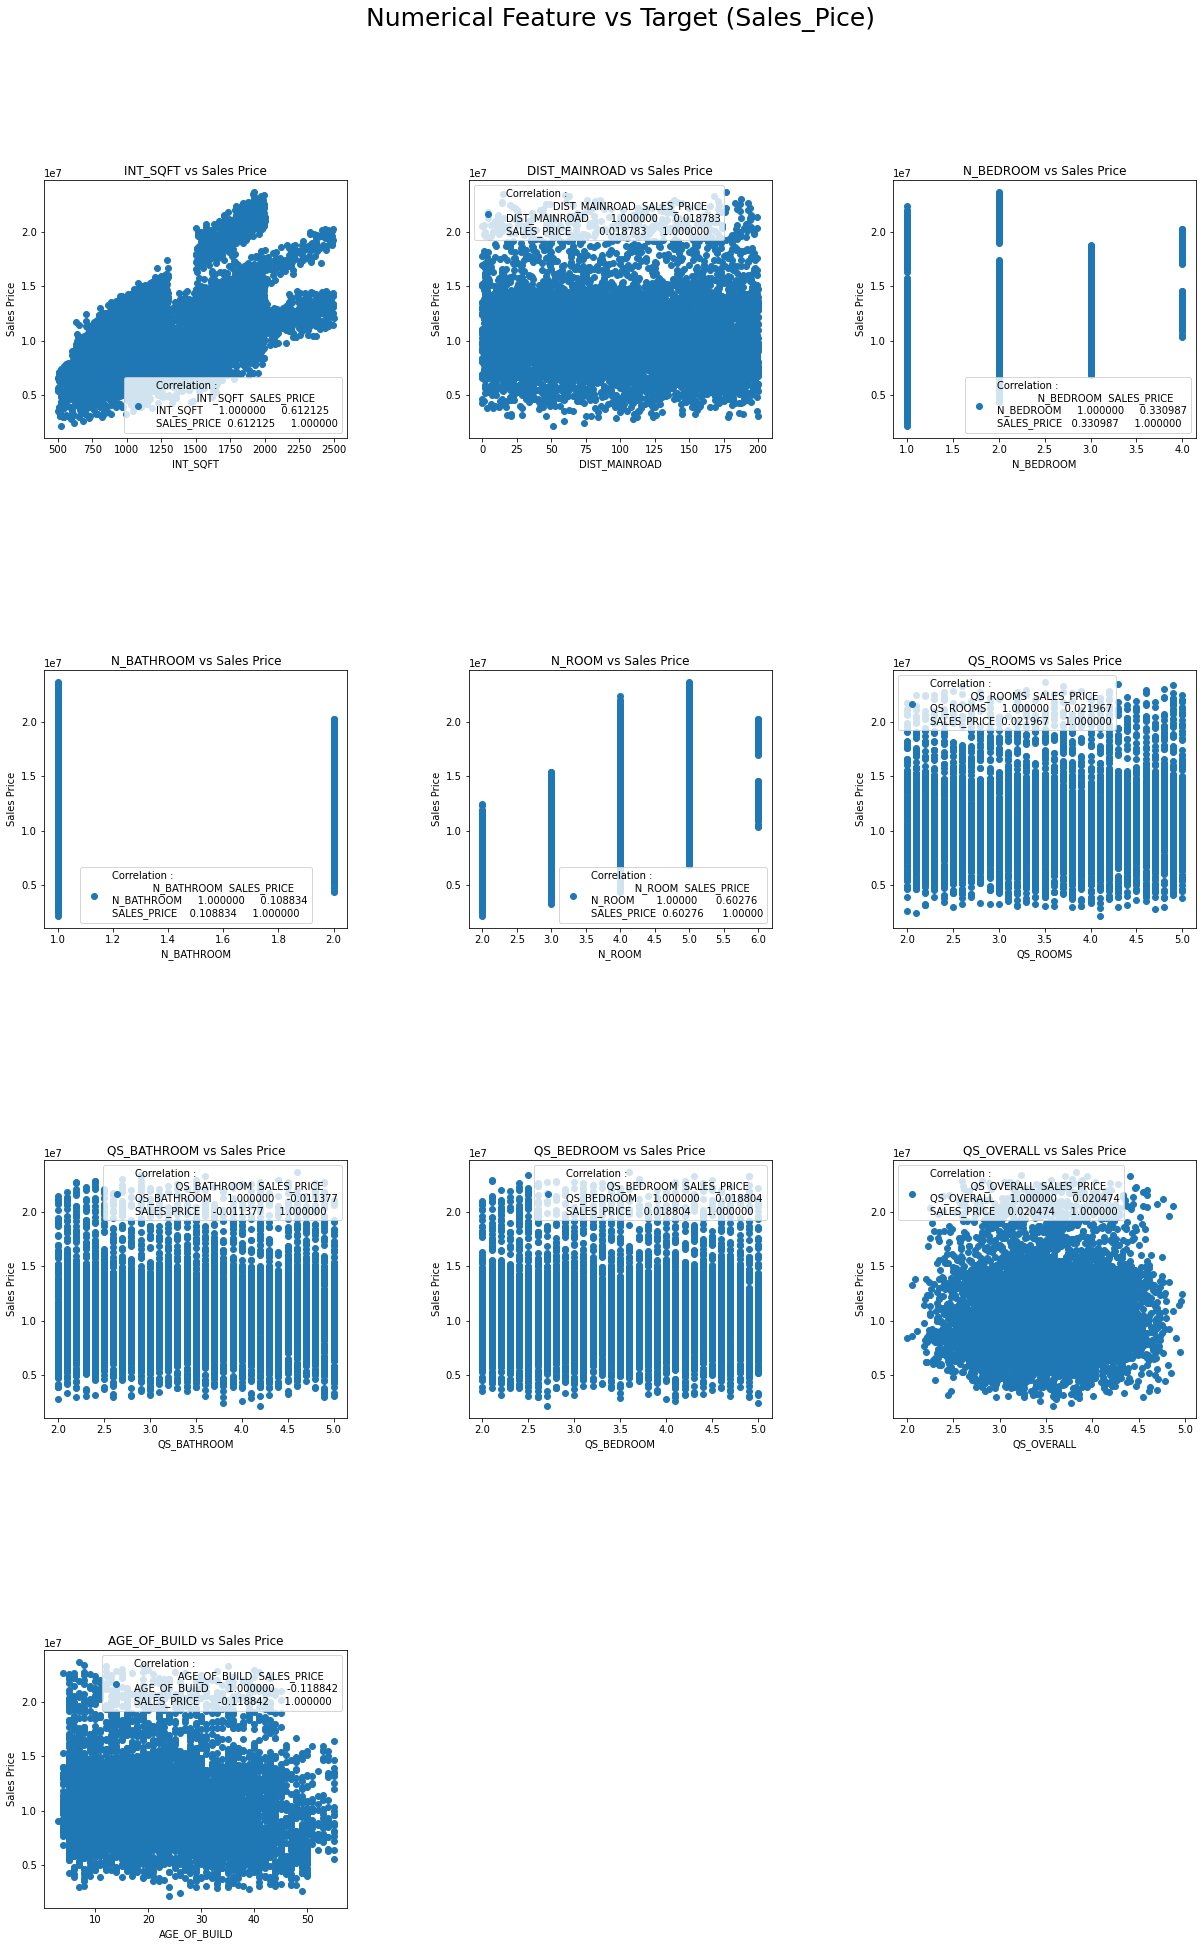

In [113]:
j = 0
plt.figure(figsize = (20,30))
plt.suptitle('Numerical Feature vs Target (Sales_Pice)', fontsize=25)

for i in data_num:
  plt.subplot(4,3,j+1)
  lab = data[[i, 'SALES_PRICE']].corr()
  plt.scatter(x = data[i], y = data['SALES_PRICE'], label = f'Correlation : \n{lab}')
  plt.xlabel(i)
  plt.ylabel('Sales Price')
  plt.title('{} vs Sales Price'.format(i))
  plt.legend()
  j += 1

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.9)


plt.show()

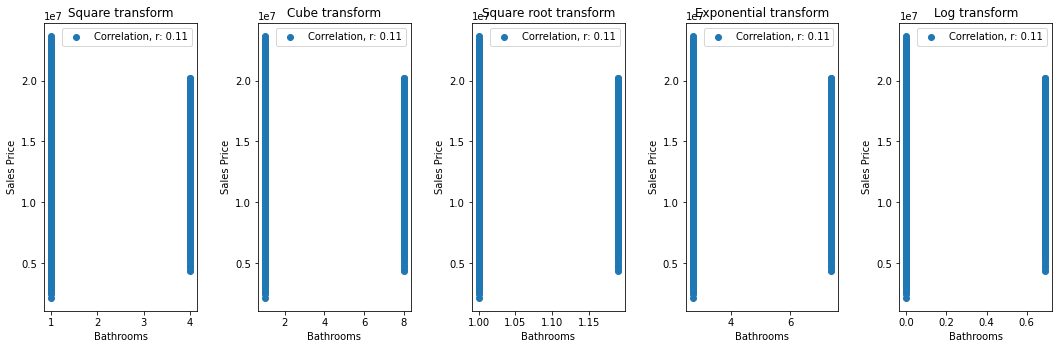

In [114]:
def plot():
  r = data[['Transformed', 'SALES_PRICE']].corr()
  r = float(r['SALES_PRICE'][0])
  plt.scatter(data['Transformed'], data['SALES_PRICE'], label = 'Correlation, r: {:.2f}'.format(r))
  plt.xlabel('Bathrooms')
  plt.ylabel('Sales Price')
  plt.legend()
  plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.9)

j = 0
plt.figure(figsize = (17.5,5))

for i in range(5):
  plt.subplot(1,5,j+1)
  if i== 0:
    data['Transformed'] = np.square(data['N_BATHROOM'])
    plt.title('Square transform')
    plot()
  elif i ==1 :
    data['Transformed'] = np.power(data['N_BATHROOM'], 3)
    plt.title('Cube transform')
    plot()
  elif i == 2:
    data['Transformed'] = np.power(data['N_BATHROOM'], 0.25)
    plt.title('Square root transform')
    plot()
  elif i == 3:
    data['Transformed'] = np.exp(data['N_BATHROOM'])
    plt.title('Exponential transform')
    plot()
  else:
    data['Transformed'] = np.log(data['N_BATHROOM'])
    plt.title('Log transform')
    plot()
  j+=1

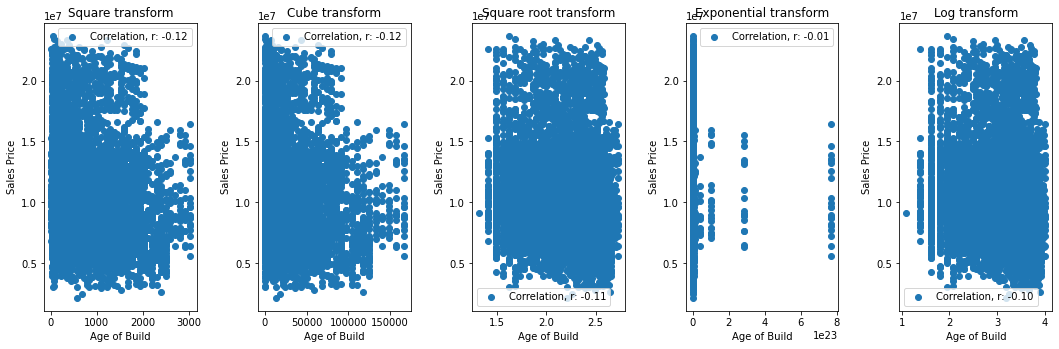

In [115]:
def plot():
  r = data[['Transformed', 'SALES_PRICE']].corr()
  r = float(r['SALES_PRICE'][0])
  plt.scatter(data['Transformed'], data['SALES_PRICE'], label = 'Correlation, r: {:.2f}'.format(r))
  plt.xlabel('Age of Build')
  plt.ylabel('Sales Price')
  plt.legend()
  plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.9)

j = 0
plt.figure(figsize = (17.5,5))

for i in range(5):
  plt.subplot(1,5,j+1)
  if i== 0:
    data['Transformed'] = np.square(data['AGE_OF_BUILD'])
    plt.title('Square transform')
    plot()
  elif i ==1 :
    data['Transformed'] = np.power(data['AGE_OF_BUILD'], 3)
    plt.title('Cube transform')
    plot()
  elif i == 2:
    data['Transformed'] = np.power(data['AGE_OF_BUILD'], 0.25)
    plt.title('Square root transform')
    plot()
  elif i == 3:
    data['Transformed'] = np.exp(data['AGE_OF_BUILD'])
    plt.title('Exponential transform')
    plot()
  else:
    data['Transformed'] = np.log(data['AGE_OF_BUILD'])
    plt.title('Log transform')
    plot()
  j+=1

In [116]:
del data['Transformed']

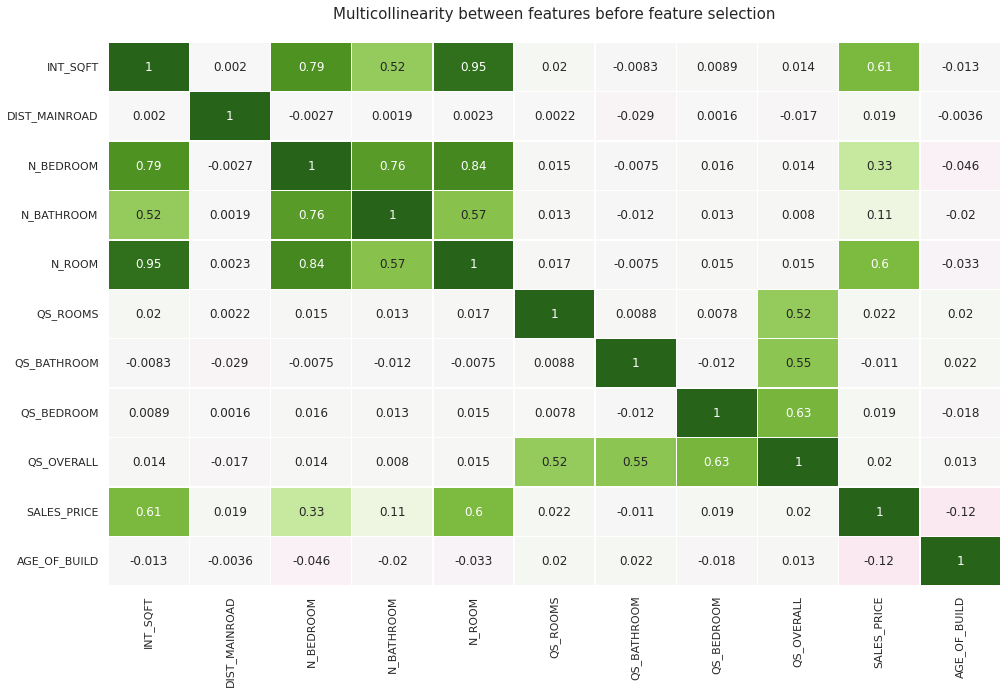

In [117]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="PiYG")
plt.title('Multicollinearity between features before feature selection\n', fontsize = 15)
plt.show()

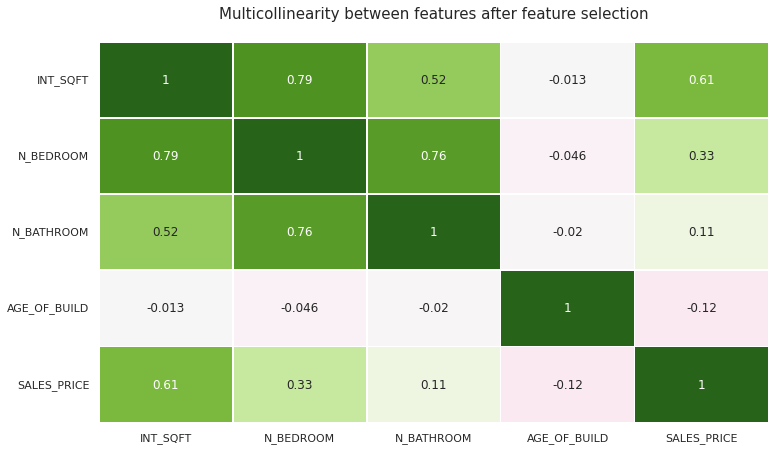

In [118]:
sns.set(rc={'figure.figsize':(12,7)})
sns.heatmap(data[['INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'AGE_OF_BUILD', 'SALES_PRICE']].corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="PiYG")
plt.title('Multicollinearity between features after feature selection\n', fontsize = 15)
plt.show()

In [119]:
data['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

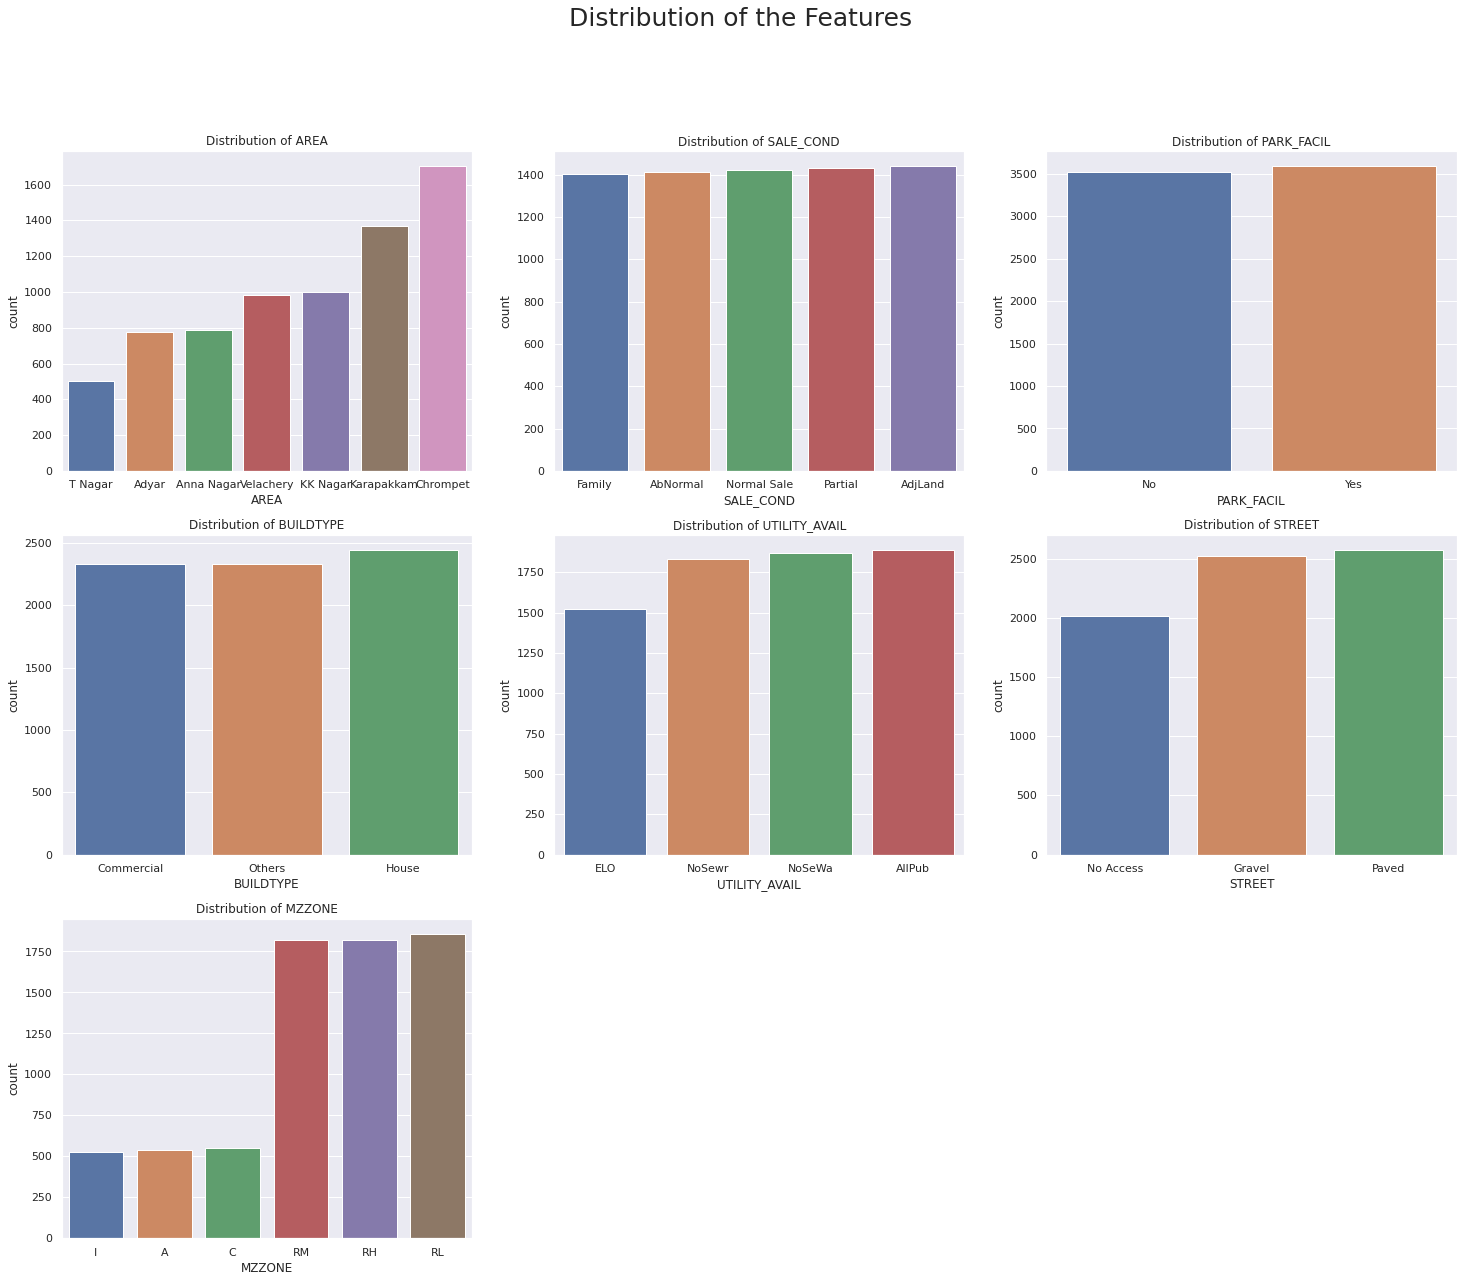

In [120]:
j = 0
plt.figure(figsize = (25, 20))
plt.suptitle(' Distribution of the Features', fontsize=25)

for i in data_cat:
  plt.subplot(3,3,j+1)
  sns.countplot(x=i, data=data,
                order = data[i].value_counts(ascending = True).index)
  plt.xlabel(i)
  plt.title(f'Distribution of {i}')
  j += 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

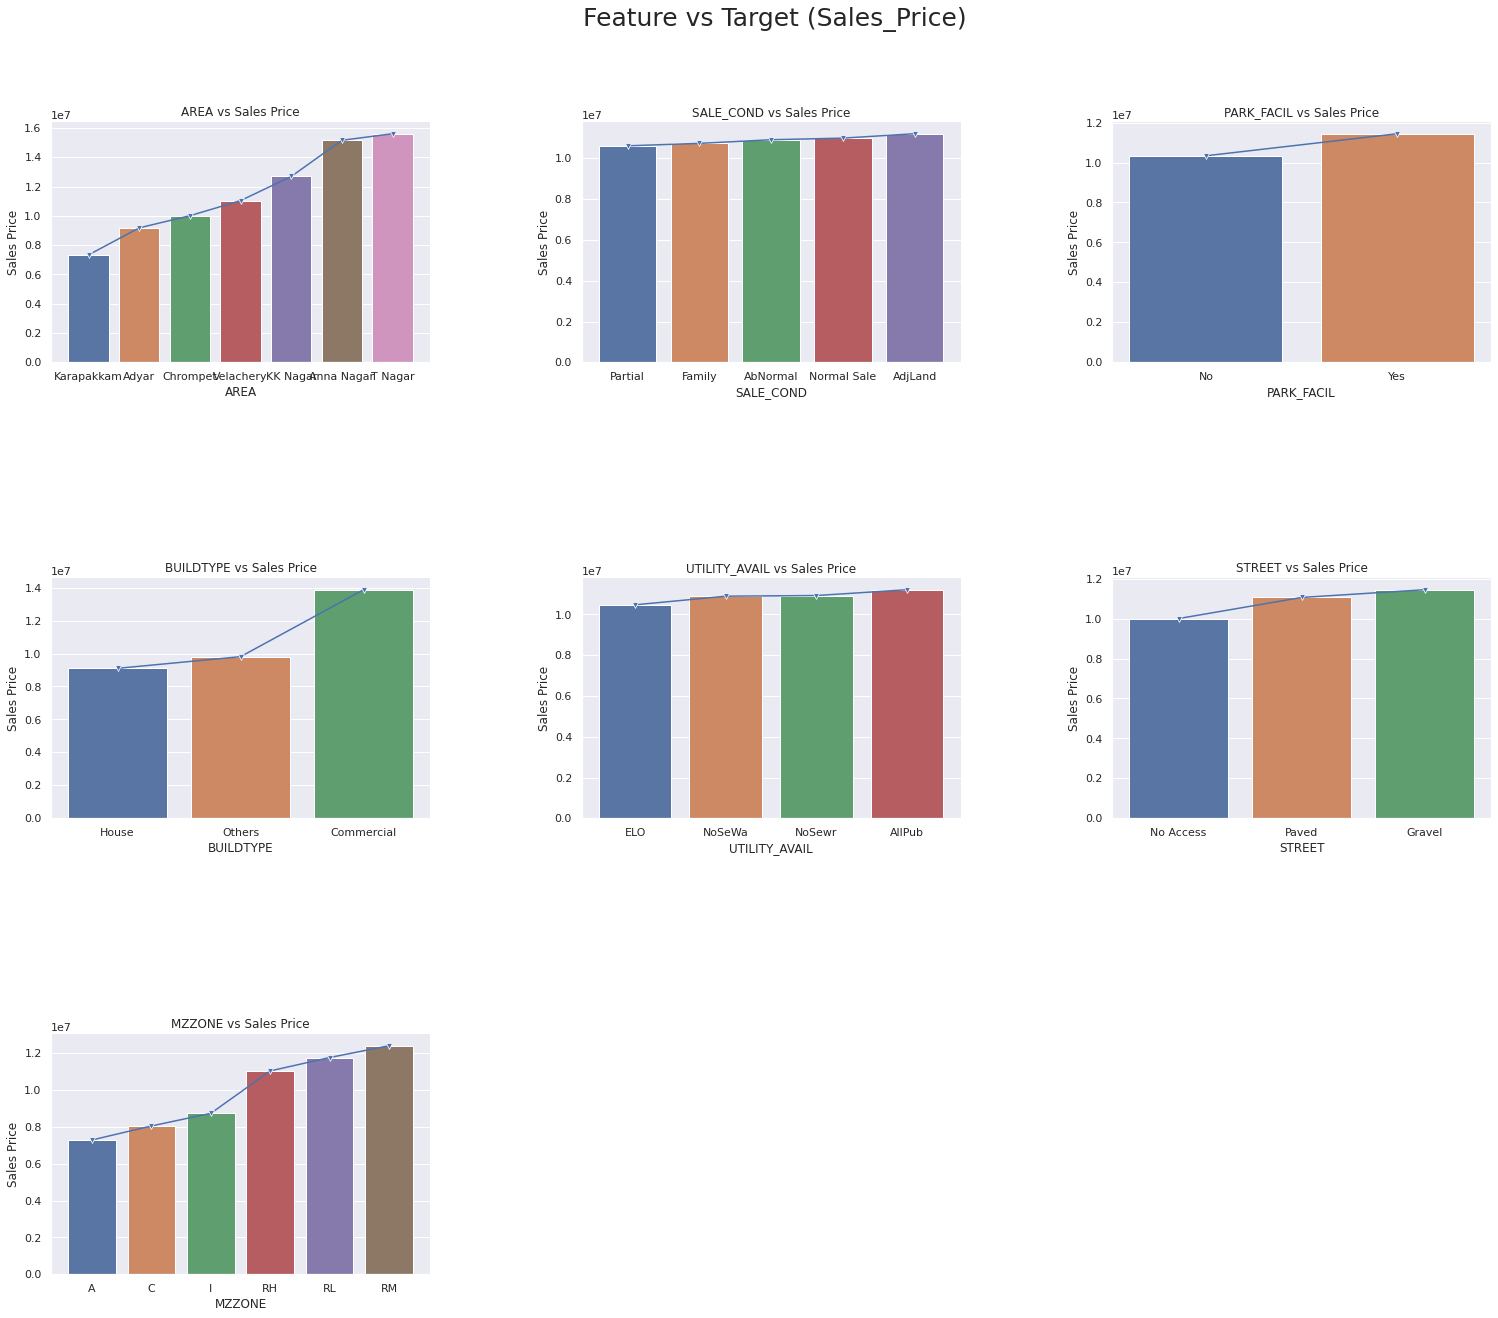

In [121]:
j = 0
plt.figure(figsize = (25,20))
plt.suptitle(' Feature vs Target (Sales_Price)', fontsize=25)



for i in data_cat:
  plt.subplot(3,3,j+1)
  result = data.groupby(i)['SALES_PRICE'].mean().sort_values()
  x = result.index
  y = result.values
  sns.barplot(x, y, order = x)
  sns.lineplot(x,y, marker = 'v')
  plt.xlabel(i)
  plt.ylabel('Sales Price')
  plt.title('{} vs Sales Price'.format(i))
  sns.despine()
  j += 1

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.9)


plt.show()

In [122]:
data_cat

['AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

In [123]:
data_business = data.copy()
data_business.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_OF_BUILD
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [124]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_OF_BUILD
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [125]:
data['AREA'] = data['AREA'].map({'Karapakkam':0, 'Adyar':1, 'Chrompet': 2, 'Velachery':3, 'KK Nagar':4, 'Anna Nagar':5, 'T Nagar':6})

data['SALE_COND'] = data['SALE_COND'].map({'Partial':0, 'Family':1, 'AbNormal':2, 'Normal Sale':3, 'AdjLand':4})

data['PARK_FACIL'] = data['PARK_FACIL'].map({'No':0, 'Yes':1})

data['UTILITY_AVAIL'] = data['UTILITY_AVAIL'].map({'ELO':0, 'NoSeWa':1, 'NoSewr':2, 'AllPub':3})

data['STREET'] = data['STREET'].map({'No Access':0, 'Paved': 1, 'Gravel': 2})

data['MZZONE'] = data['MZZONE'].map({'A':0, 'C': 1, 'I':2, 'RH':3, 'RL':4, 'RM':5})

data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_OF_BUILD
0,0,1004,131,1,1,3,2,1,Commercial,3,1,0,4.0,3.9,4.9,4.330,7600000,44
1,5,1986,26,2,1,5,2,0,Commercial,3,2,3,4.9,4.2,2.5,3.765,21717770,11
2,1,909,70,1,1,3,2,1,Commercial,0,2,4,4.1,3.8,2.2,3.090,13159200,20
3,3,1855,14,3,2,5,1,0,Others,2,1,2,4.7,3.9,3.6,4.010,9630290,22
4,0,1226,84,1,1,3,2,1,Others,3,2,1,3.0,2.5,4.1,3.290,7406250,30


In [126]:
del data['DIST_MAINROAD']

del data['N_ROOM']

del data['QS_BATHROOM']
del data['QS_BEDROOM']
del data['QS_ROOMS']
del data['QS_OVERALL']

data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BUILD
0,0,1004,1,1,2,1,Commercial,3,1,0,7600000,44
1,5,1986,2,1,2,0,Commercial,3,2,3,21717770,11
2,1,909,1,1,2,1,Commercial,0,2,4,13159200,20
3,3,1855,3,2,1,0,Others,2,1,2,9630290,22
4,0,1226,1,1,2,1,Others,3,2,1,7406250,30


In [127]:
data = pd.get_dummies(data, columns = ['BUILDTYPE'])

In [128]:
data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BUILD,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,0,1004,1,1,2,1,3,1,0,7600000,44,1,0,0
1,5,1986,2,1,2,0,3,2,3,21717770,11,1,0,0
2,1,909,1,1,2,1,0,2,4,13159200,20,1,0,0
3,3,1855,3,2,1,0,2,1,2,9630290,22,0,0,1
4,0,1226,1,1,2,1,3,2,1,7406250,30,0,0,1


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   AREA                  7109 non-null   int64
 1   INT_SQFT              7109 non-null   int64
 2   N_BEDROOM             7109 non-null   int64
 3   N_BATHROOM            7109 non-null   int64
 4   SALE_COND             7109 non-null   int64
 5   PARK_FACIL            7109 non-null   int64
 6   UTILITY_AVAIL         7109 non-null   int64
 7   STREET                7109 non-null   int64
 8   MZZONE                7109 non-null   int64
 9   SALES_PRICE           7109 non-null   int64
 10  AGE_OF_BUILD          7109 non-null   int64
 11  BUILDTYPE_Commercial  7109 non-null   uint8
 12  BUILDTYPE_House       7109 non-null   uint8
 13  BUILDTYPE_Others      7109 non-null   uint8
dtypes: int64(11), uint8(3)
memory usage: 631.9 KB


In [130]:
data.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE',
       'AGE_OF_BUILD', 'BUILDTYPE_Commercial', 'BUILDTYPE_House',
       'BUILDTYPE_Others'],
      dtype='object')

In [131]:
data = data[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM',  'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
        'BUILDTYPE_Commercial', 'BUILDTYPE_House',
       'BUILDTYPE_Others', 'AGE_OF_BUILD', 'SALES_PRICE']]

data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,AGE_OF_BUILD,SALES_PRICE
0,0,1004,1,1,2,1,3,1,0,1,0,0,44,7600000
1,5,1986,2,1,2,0,3,2,3,1,0,0,11,21717770
2,1,909,1,1,2,1,0,2,4,1,0,0,20,13159200
3,3,1855,3,2,1,0,2,1,2,0,0,1,22,9630290
4,0,1226,1,1,2,1,3,2,1,0,0,1,30,7406250


## **ML Models Train Test Data - Normalized**

In [132]:
X = data.iloc[:, :-1].values
y = data.loc[:, 'SALES_PRICE'].values

X.shape, y.shape

((7109, 13), (7109,))

In [133]:
!pip install sklearn -q

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [135]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train, y_train) # find mean and standard deviation

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

## **1. LINEAR REGRESSION**

In [136]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

regression.fit(X_train, y_train)

LinearRegression()

In [137]:
m = regression.coef_
c = regression.intercept_

In [138]:
y_pred = regression.predict(X_test)

Feature: AREA, Score: 0.000
Feature: INT_SQFT, Score: 0.000
Feature: N_BEDROOM, Score: 0.000
Feature: N_BATHROOM, Score: 0.000
Feature: SALE_COND, Score: 0.000
Feature: PARK_FACIL, Score: 0.000
Feature: UTILITY_AVAIL, Score: 0.000
Feature: STREET, Score: 0.000
Feature: MZZONE, Score: 0.000
Feature: BUILDTYPE_Commercial, Score: 0.331
Feature: BUILDTYPE_House, Score: 0.336
Feature: BUILDTYPE_Others, Score: 0.333
Feature: AGE_OF_BUILD, Score: 0.000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


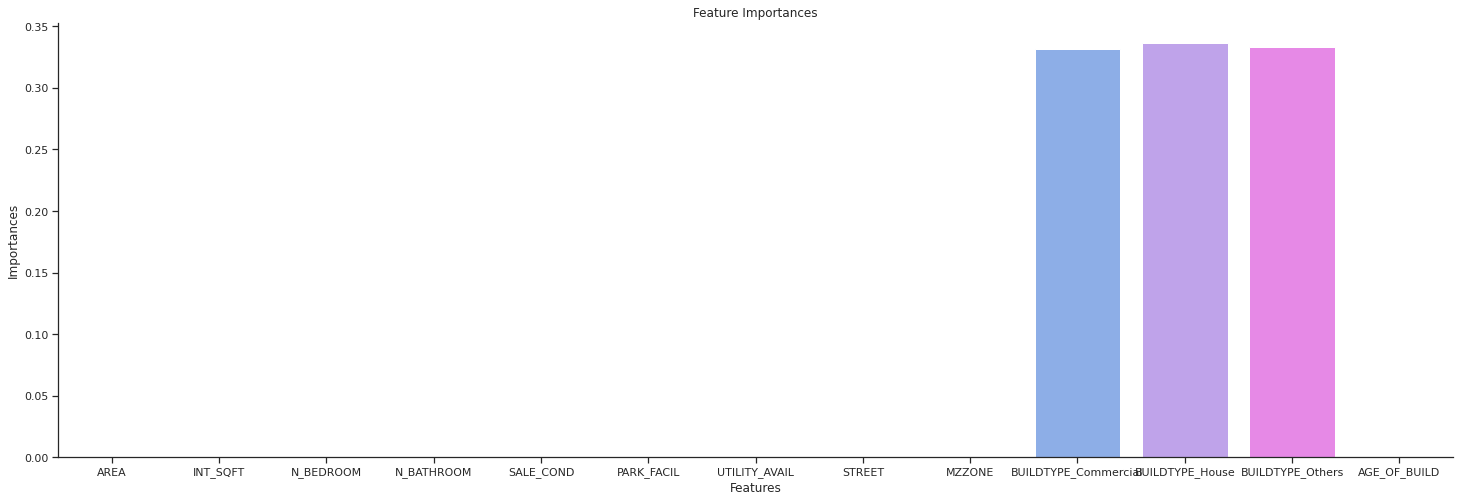

In [139]:
importance = regression.coef_
importance = importance.tolist()
importance = [abs(x) for x in importance]
sum = 0
for j in importance:
  sum += j
importance = [(i/sum) for i in importance]

# summarize feature importance
for col,val in enumerate(importance):
	print('Feature: {}, Score: {:.3f}'.format(data.columns[col],val))
   
# plot feature importance
plt.figure(figsize = (25,8))
sns.set(style = 'ticks')
sns.barplot([data.columns[x] for x in range(len(importance))], importance)
plt.title('Feature Importances')
plt.ylabel('Importances')
plt.xlabel('Features')
sns.despine()
plt.savefig('Feature Importances Linear Regression.jpg', dpi = 400)
plt.show()

In [140]:
from sklearn import metrics
print('R2 score :', metrics.r2_score(y_test, y_pred).round(2))

R2 score : 0.91


## **2. K-Nearest Neighbour (KNN) Regression**

In [141]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

K = []

for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,50]: # looping to find best K
    knn = KNeighborsRegressor(i) #initialising the model
    knn.fit(X_train,y_train) # training the model
    # print("K value  : " , i, " score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=j)).round(4) , f'cv : {j}') #predicting using the model

    K.append({'K Value' : i, 'Cross_val_Score': np.mean(cross_val_score(knn, X_train, y_train, cv = 10)).round(5)})
    score = pd.DataFrame(K, columns = ['K Value', 'Cross_val_Score'])

score = score.sort_values(by = 'Cross_val_Score', ascending = False).head()
score

,K Value,Cross_val_Score
4,5,0.93095
5,6,0.92971
6,7,0.92929
3,4,0.92881
7,8,0.92863


In [142]:
K = score.iloc[0,0]

In [143]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score

def KNN(K, w, p):
  KNN_regressor = KNeighborsRegressor(n_neighbors = K, weights = w, p = p)
  KNN_regressor.fit(X_train, y_train)

  y_pred = KNN_regressor.predict(X_test)

  print(w.upper(), f'at p = {p}:')
  print('K value : ', K,  
        '\ntrain score : ', KNN_regressor.score(X_train, y_train).round(4),
        '\naccuracy :', KNN_regressor.score(X_test, y_test).round(2),
        '\nr2_score :', metrics.r2_score(y_test, y_pred).round(2), '\n')

  
KNN(K, 'distance', 1)

DISTANCE at p = 1:
K value :  5 
train score :  1.0 
accuracy : 0.95 
r2_score : 0.95 



In [144]:
KNN(K, 'distance', 2)

DISTANCE at p = 2:
K value :  5 
train score :  1.0 
accuracy : 0.93 
r2_score : 0.93 



In [145]:
KNN(K, 'uniform', 1)

UNIFORM at p = 1:
K value :  5 
train score :  0.9661 
accuracy : 0.94 
r2_score : 0.94 



In [146]:
KNN(K, 'uniform', 2)

UNIFORM at p = 2:
K value :  5 
train score :  0.9567 
accuracy : 0.92 
r2_score : 0.92 



## **3. Decision Tree**

In [147]:
from sklearn.tree import DecisionTreeRegressor

DT = []

for depth in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,30,40,50]:
  dt = DecisionTreeRegressor(max_depth=depth)

  # dt.fit(X_train, y_train) - have to use fresh model for cross validation

  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10)
  DT.append({'Depth' : depth, 'Cross_val_Score': np.mean(valAccuracy).round(5)})
  score = pd.DataFrame(DT, columns = ['Depth', 'Cross_val_Score'])

score = score.sort_values(by = 'Cross_val_Score', ascending = False).head()
score

,Depth,Cross_val_Score
11,12,0.97001
15,20,0.96984
18,50,0.96982
17,40,0.96966
12,13,0.96963


In [148]:
depth = score.iloc[0,0] # row 1 - max Cross_val_Score, column 0 Depth
depth

12

In [149]:
dt = DecisionTreeRegressor(max_depth = depth)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

print('R2 score for Decision Tree Model:', metrics.r2_score(y_test, y_pred).round(2))

R2 score for Decision Tree Model: 0.97


In [150]:
fimp = dt.feature_importances_.round(3)
List = fimp.tolist()
Fea = data.columns[:-1].tolist()

val = {
    'Feature' : Fea,
    'Importances' : List
}

Feature = pd.DataFrame(val).sort_values(by='Importances', ascending = False)
Feature

,Feature,Importances
0,AREA,0.479
9,BUILDTYPE_Commercial,0.328
1,INT_SQFT,0.113
8,MZZONE,0.039
5,PARK_FACIL,0.015
7,STREET,0.012
12,AGE_OF_BUILD,0.005
11,BUILDTYPE_Others,0.003
4,SALE_COND,0.002
10,BUILDTYPE_House,0.002


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


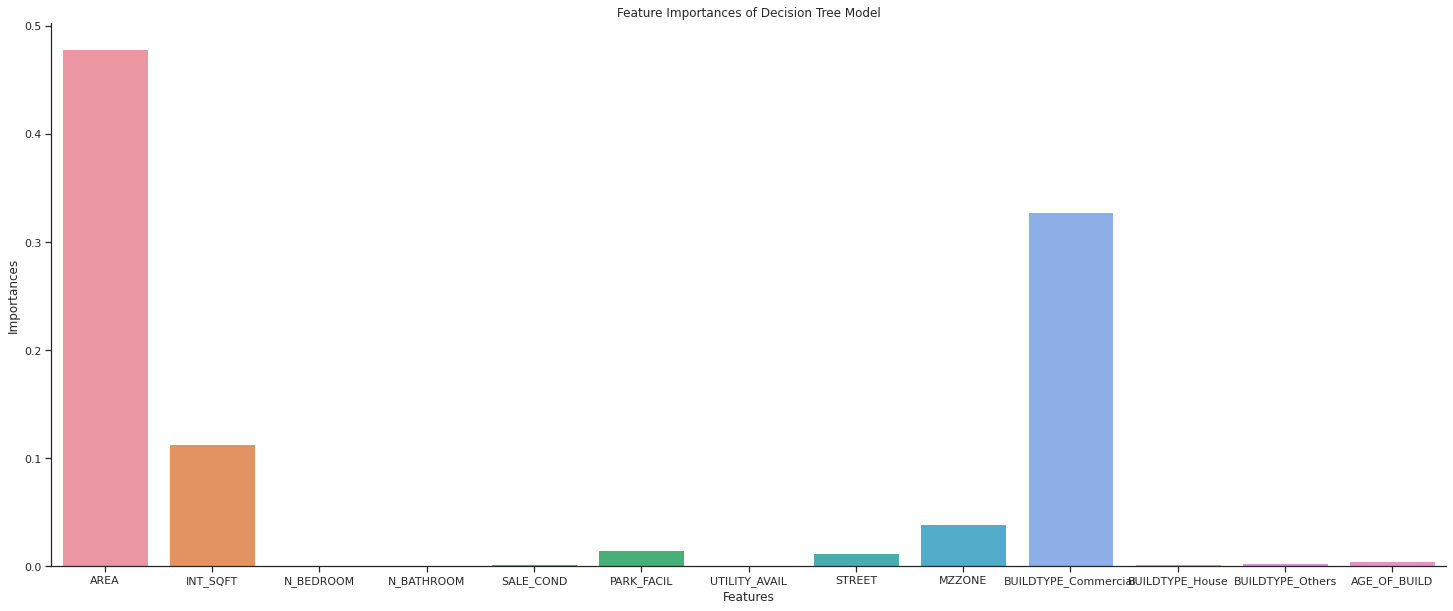

In [151]:
plt.figure(figsize = (25,10))
sns.set(style = 'ticks')
sns.barplot([data.columns[x] for x in range(len(List))], List)
plt.title('Feature Importances of Decision Tree Model')
plt.ylabel('Importances')
plt.xlabel('Features')
sns.despine()
plt.savefig('Feature Importances Decision Tree.jpg', dpi = 400)
plt.show()

## **4. Random Forest**

In [152]:
from sklearn.ensemble import RandomForestRegressor

depth = int(np.log(13)/np.log(2)) # log2(number of features)

rf = RandomForestRegressor(max_depth= depth, max_features = 'sqrt')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print('R2 score for Random Forest Model:', metrics.r2_score(y_test, y_pred).round(2))

R2 score for Random Forest Model: 0.77


In [153]:
from sklearn.ensemble import RandomForestRegressor

RF = []

for depth in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,30,40,50]:
  rf = RandomForestRegressor(max_depth= depth, max_features = 'sqrt')

  valAccuracy = cross_val_score(rf, X_train, y_train, cv=10)
  RF.append({'Depth' : depth, 'Cross_val_Score': np.mean(valAccuracy).round(5)})
  score = pd.DataFrame(RF, columns = ['Depth', 'Cross_val_Score'])

score = score.sort_values(by = 'Cross_val_Score', ascending = False).head()
score

,Depth,Cross_val_Score
18,50,0.98617
15,20,0.98609
16,30,0.98598
17,40,0.98593
14,15,0.98576


In [154]:
depth = score.iloc[0,0]

In [155]:
rf = RandomForestRegressor(max_depth = depth, max_features = 'sqrt')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print('R2 score for Random Forest Model:', metrics.r2_score(y_test, y_pred).round(2))

R2 score for Random Forest Model: 0.99


In [156]:
fimp = rf.feature_importances_.round(3)
List = fimp.tolist()
Fea = data.columns[:-1].tolist()

val = {
    'Feature' : Fea,
    'Importances' : List
}

Feature = pd.DataFrame(val).sort_values(by='Importances', ascending = False)
Feature

,Feature,Importances
0,AREA,0.268
9,BUILDTYPE_Commercial,0.223
1,INT_SQFT,0.211
8,MZZONE,0.088
10,BUILDTYPE_House,0.061
2,N_BEDROOM,0.039
11,BUILDTYPE_Others,0.036
12,AGE_OF_BUILD,0.020
5,PARK_FACIL,0.016
7,STREET,0.013


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


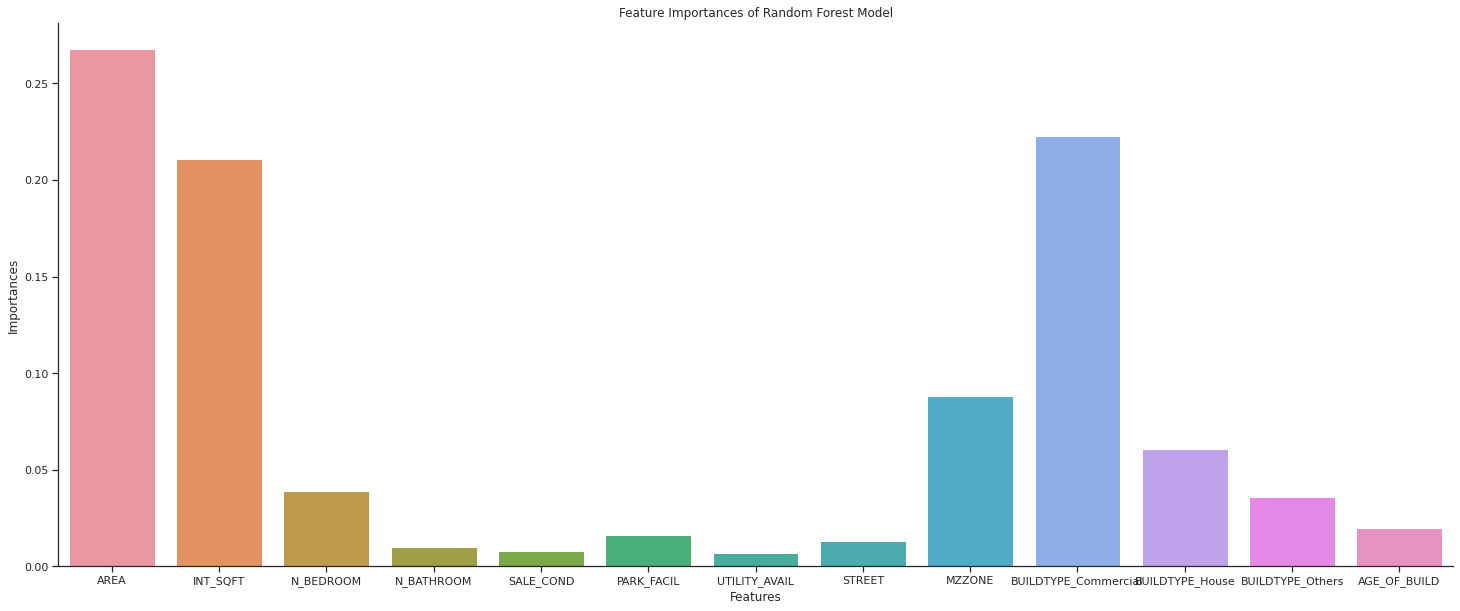

In [157]:
plt.figure(figsize = (25,10))
sns.set(style = 'ticks')
sns.barplot([data.columns[x] for x in range(len(List))], List)
plt.title('Feature Importances of Random Forest Model')
plt.ylabel('Importances')
plt.xlabel('Features')
sns.despine()
plt.savefig('Feature Importances Random Forest.jpg', dpi = 400)
plt.show()

## **5. XG Boost**

In [158]:
!pip install xgboost -q

In [159]:
import xgboost as xgb

XG = []

for lr in [0.01,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  XGB = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  XGB.fit(X_train,y_train) #train the model
  valAccuracy = np.mean(cross_val_score(XGB, X_train, y_train, cv=10)).round(5)
  # print("Learning rate : ", lr," Cross-Val score : ", valAccuracy )

  XG.append({'Learning rate' : lr, 'Cross_val_Score': valAccuracy})
  score = pd.DataFrame(XG, columns = ['Learning rate', 'Cross_val_Score'])

score = score.sort_values(by = 'Cross_val_Score', ascending = False).head()
score

,Learning rate,Cross_val_Score
10,0.70,0.99674
9,0.50,0.99642
11,1.00,0.99578
8,0.20,0.99557
7,0.15,0.99433


In [160]:
lr = score.iloc[0,0]
lr

0.7

In [161]:
XGB = xgb.XGBRegressor(learning_rate = lr, n_estimators=100)
XGB.fit(X_train, y_train) #train the model

y_pred = XGB.predict(X_test)

print('\nR2 score for XG Boost Regressor:', metrics.r2_score(y_test, y_pred).round(2))

[05:37:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

R2 score for XG Boost Regressor: 1.0


In [162]:
fimp = rf.feature_importances_.round(3)
List = fimp.tolist()
Fea = data.columns[:-1].tolist()

val = {
    'Feature' : Fea,
    'Importances' : List
}

Feature = pd.DataFrame(val).sort_values(by='Importances', ascending = False)
Feature

,Feature,Importances
0,AREA,0.268
9,BUILDTYPE_Commercial,0.223
1,INT_SQFT,0.211
8,MZZONE,0.088
10,BUILDTYPE_House,0.061
2,N_BEDROOM,0.039
11,BUILDTYPE_Others,0.036
12,AGE_OF_BUILD,0.020
5,PARK_FACIL,0.016
7,STREET,0.013


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


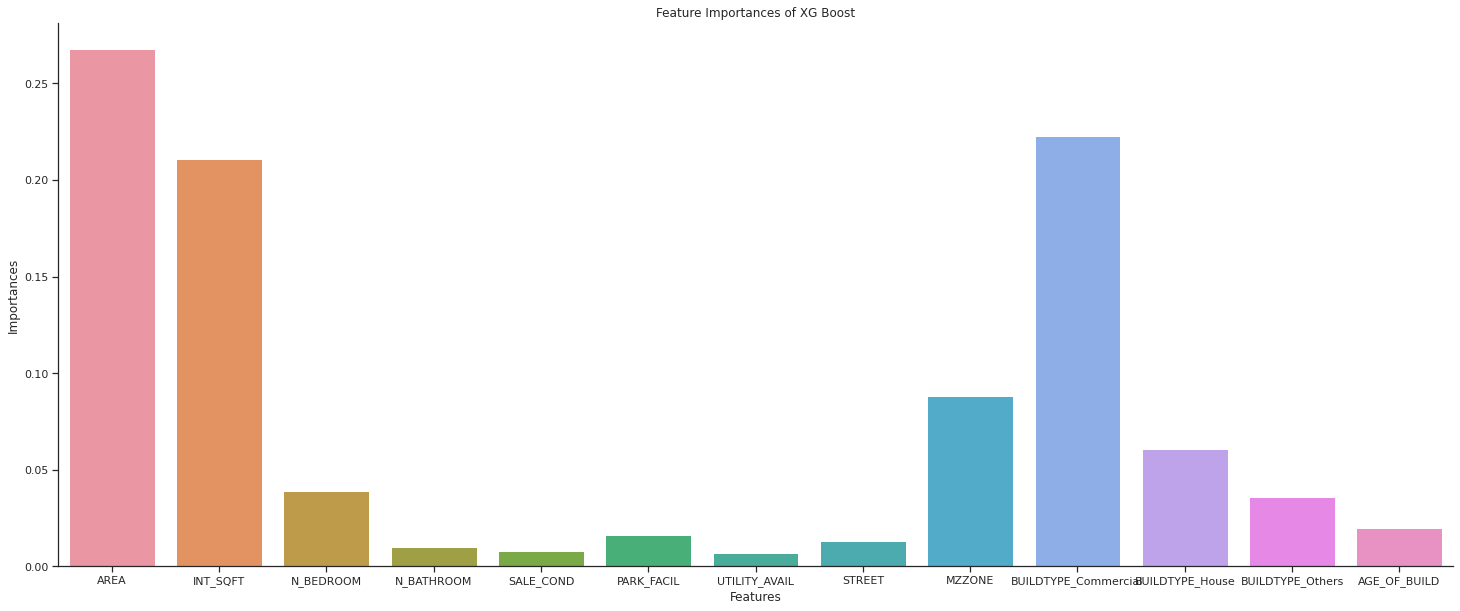

In [163]:
plt.figure(figsize = (25,10))
sns.set(style = 'ticks')
sns.barplot([data.columns[x] for x in range(len(List))], List)
plt.title('Feature Importances of XG Boost')
plt.ylabel('Importances')
plt.xlabel('Features')
sns.despine()
plt.savefig('Feature Importances XG Boost.jpg', dpi = 400)
plt.show()

## **Model Deployment**

In [164]:
import pickle
pickle_out = open("regressor.pkl", "wb")
pickle.dump(XGB, pickle_out)
pickle_out.close()

## **SOLUTIONS**

In [165]:
data_business = data_business[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM',  'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
        'BUILDTYPE', 'AGE_OF_BUILD', 'SALES_PRICE']]
        
data_business.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,BUILDTYPE,AGE_OF_BUILD,SALES_PRICE
0,Karapakkam,1004,1,1,AbNormal,Yes,AllPub,Paved,A,Commercial,44,7600000
1,Anna Nagar,1986,2,1,AbNormal,No,AllPub,Gravel,RH,Commercial,11,21717770
2,Adyar,909,1,1,AbNormal,Yes,ELO,Gravel,RL,Commercial,20,13159200
3,Velachery,1855,3,2,Family,No,NoSewr,Paved,I,Others,22,9630290
4,Karapakkam,1226,1,1,AbNormal,Yes,AllPub,Gravel,C,Others,30,7406250


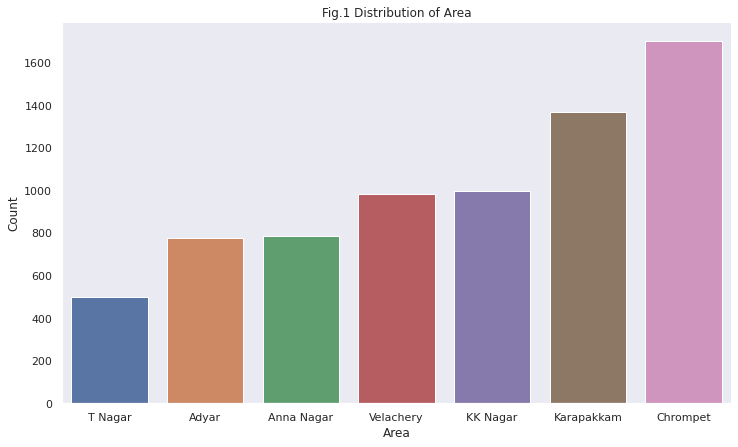

In [166]:
sns.set(style = 'dark')
sns.countplot(x='AREA', data = data_business, order = data_business['AREA'].value_counts(ascending = True).index)
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Fig.1 Distribution of Area')
sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

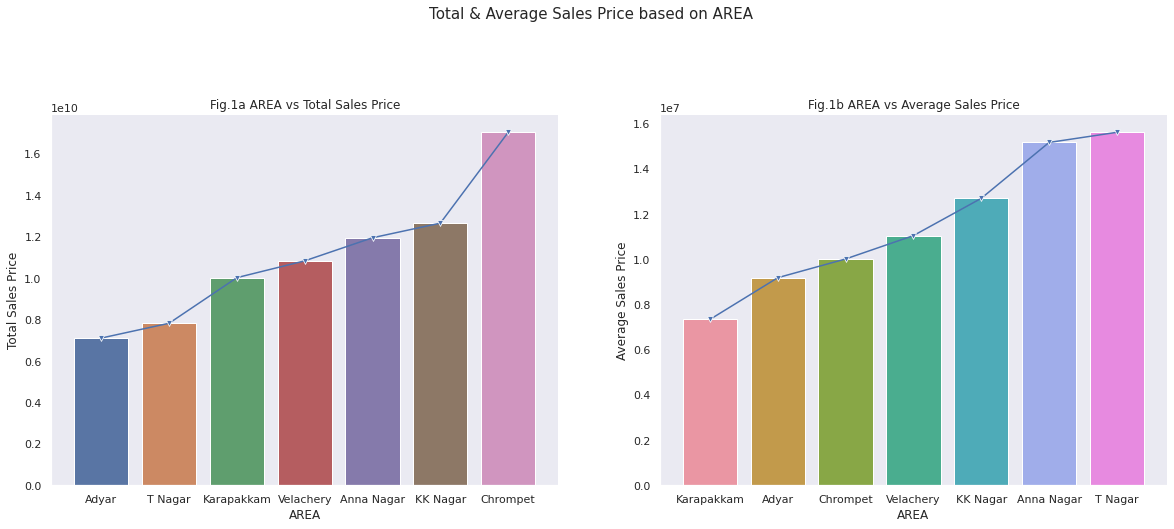

In [168]:
j = 0
plt.figure(figsize = (20,15))
plt.suptitle('Total & Average Sales Price based on AREA', fontsize = 15)

for i in range(2):
  plt.subplot(2,2,j+1)
  if i == 0:
    sns.set(style = 'dark')
    result = data_business.groupby('AREA')['SALES_PRICE'].sum().sort_values()
    plt.xlabel('Total Sales Price')
    plt.title('Fig.1a AREA vs Total Sales Price')
    plt.ylabel('Total Sales Price')
  else:
    sns.set(style = 'dark', palette = 'gist_rainbow')
    result = data_business.groupby('AREA')['SALES_PRICE'].mean().sort_values()
    plt.xlabel('Average Sales Price')
    plt.title('Fig.1b AREA vs Average Sales Price')
    plt.ylabel('Average Sales Price')
  x = result.index
  y = result.values
  sns.barplot(x, y, order = x)
  sns.lineplot(x,y, marker = 'v')
  sns.despine()
  j += 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

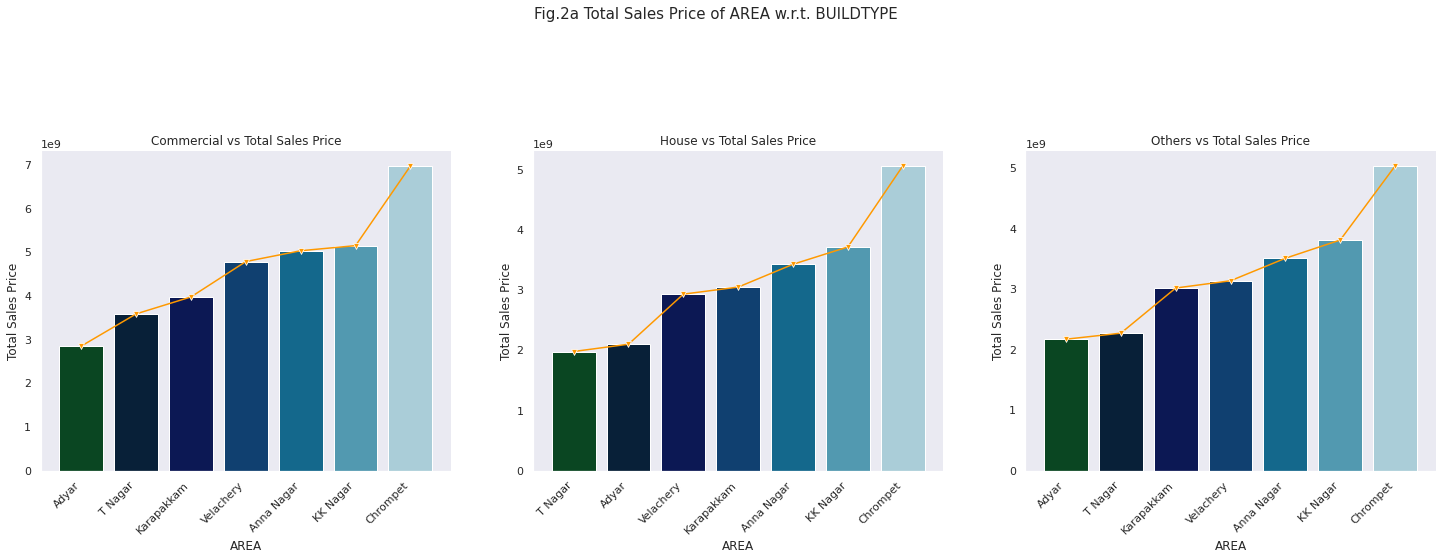

In [169]:
j = 0
plt.figure(figsize = (25,20))
plt.suptitle('Fig.2a Total Sales Price of AREA w.r.t. BUILDTYPE', fontsize=15)

for i in ['Commercial', 'House', 'Others']:
  plt.subplot(3,3,j+1)
  result = data_business[data_business['BUILDTYPE']==i].groupby('AREA')['SALES_PRICE'].sum().sort_values()
  x = result.index
  y = result.values
  ax = sns.barplot(x, y, order = x, palette = 'ocean')
  sns.lineplot(x,y, marker = 'v')
  plt.xlabel('AREA')
  plt.ylabel('Total Sales Price')
  plt.title('{} vs Total Sales Price'.format(i))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
  sns.despine()
  j += 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

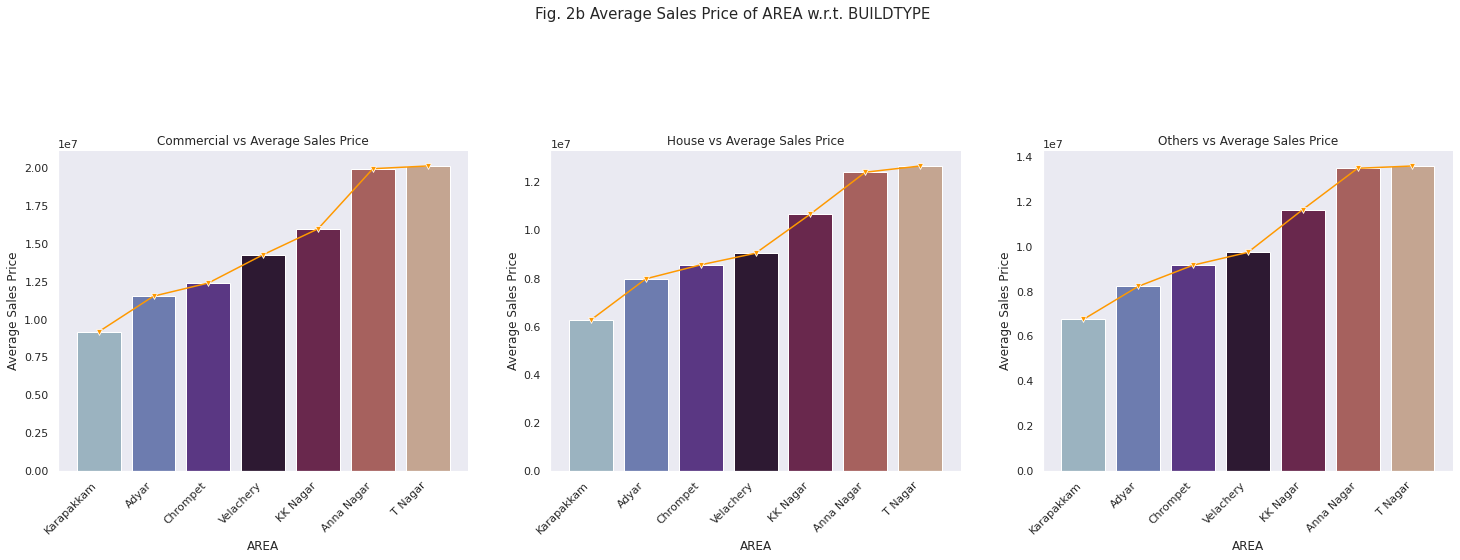

In [170]:
j = 0
plt.figure(figsize = (25,20))
plt.suptitle('Fig. 2b Average Sales Price of AREA w.r.t. BUILDTYPE', fontsize=15)

for i in ['Commercial', 'House', 'Others']:
  plt.subplot(3,3,j+1)
  result = data_business[data_business['BUILDTYPE']==i].groupby('AREA')['SALES_PRICE'].mean().sort_values()
  x = result.index
  y = result.values
  ax = sns.barplot(x, y, order = x, palette = 'twilight')
  sns.lineplot(x,y, marker = 'v')
  plt.xlabel('AREA')
  plt.ylabel('Average Sales Price')
  plt.title('{} vs Average Sales Price'.format(i))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
  sns.despine()
  j += 1

In [171]:
data_business.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [172]:
data_business['sqft_intervals'] = pd.cut(data_business['INT_SQFT'], [500, 1000, 1500, 2000, 2500], labels=['500-1000', '1000-1500', '1500-2000', '2000-2500'])
# data3["dur_intervals"] = pd.cut(data3['dur'], [500, 1000, 1500, 2000, 2500], labels=['500-1000', '1000-1500', '1500-2000', '2000-2500'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


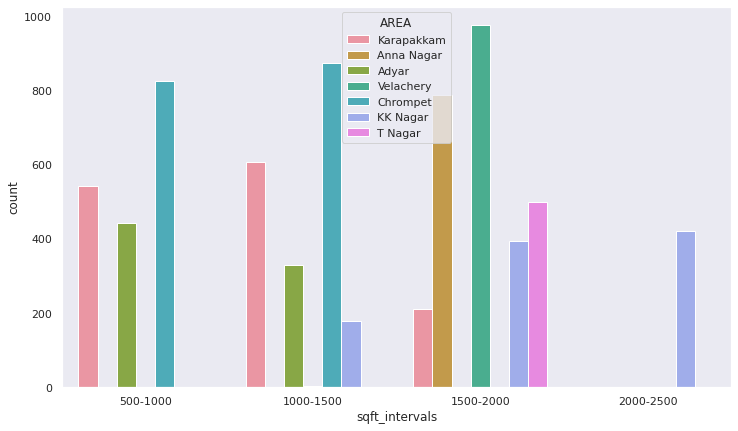

In [173]:
sns.countplot(data_business['sqft_intervals'], hue = data_business['AREA'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

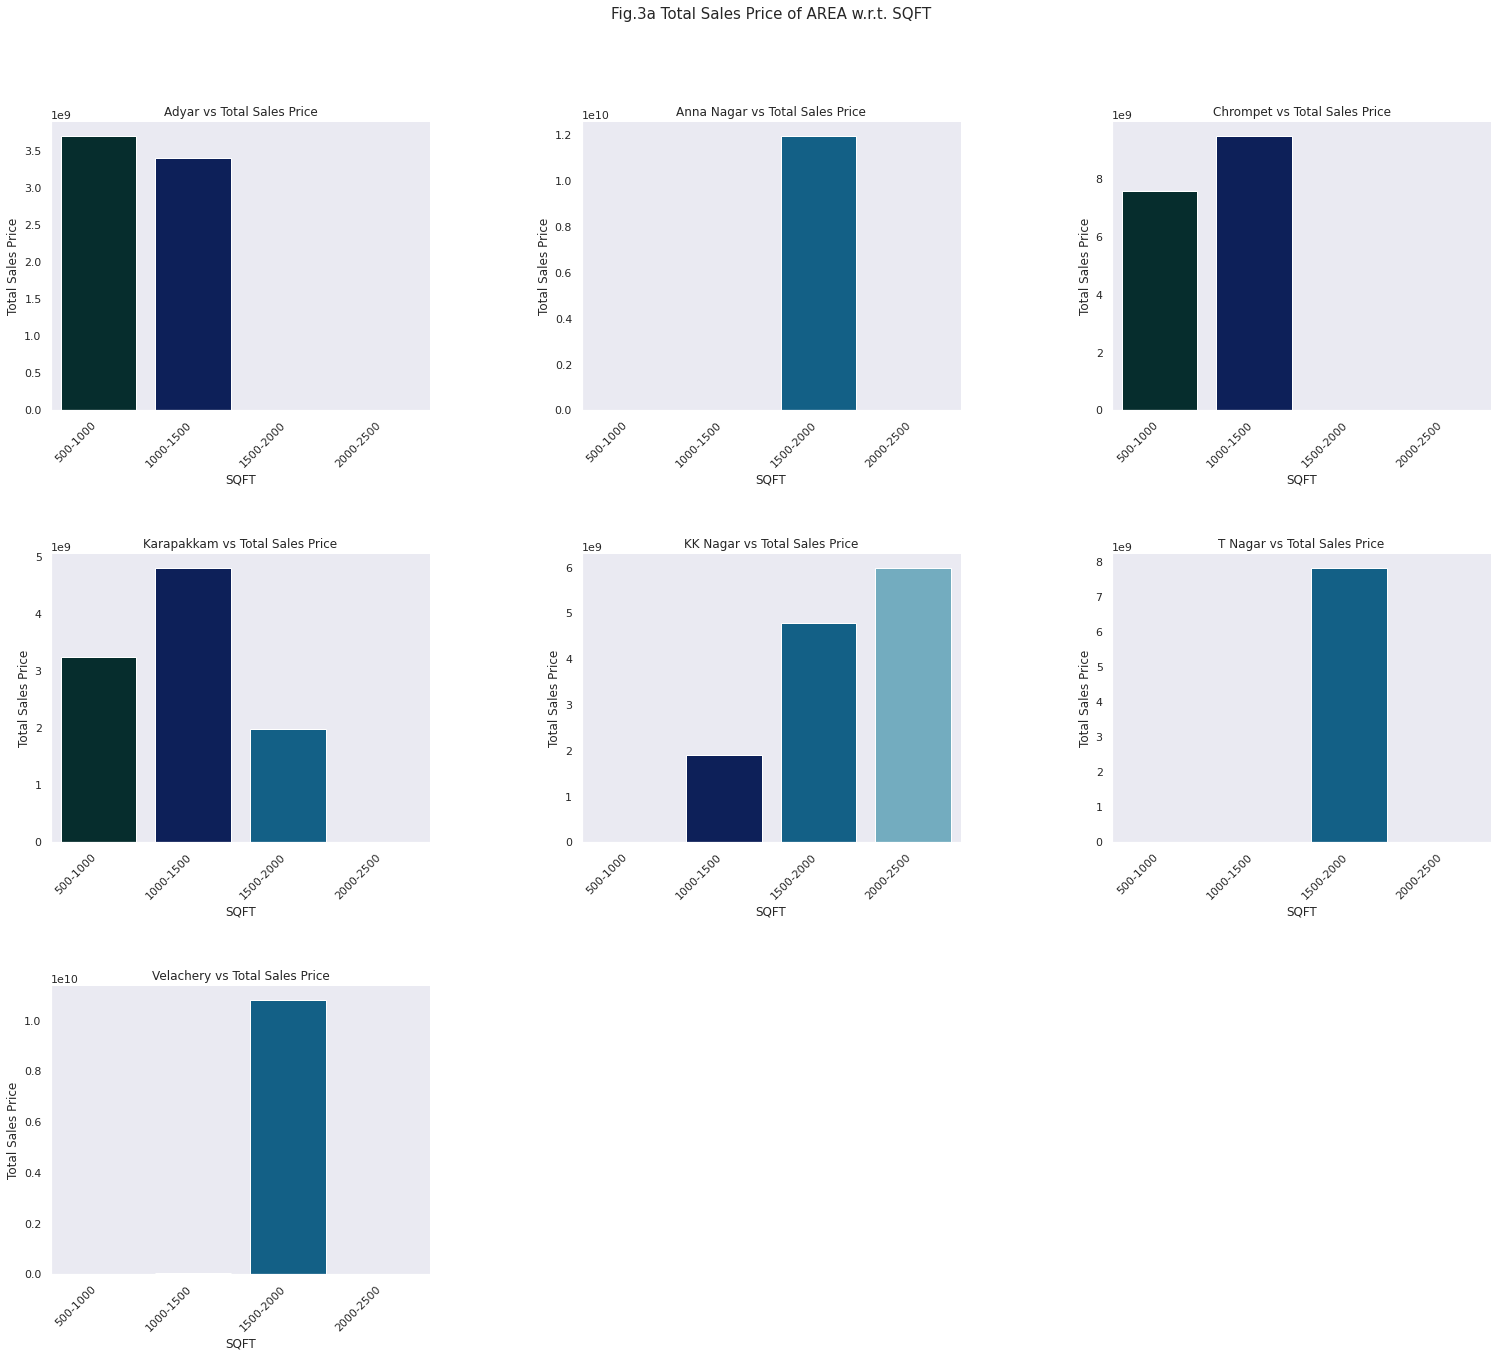

In [174]:
j = 0
plt.figure(figsize = (25,20))
plt.suptitle('Fig.3a Total Sales Price of AREA w.r.t. SQFT', fontsize=15)

for i in ['Adyar', 'Anna Nagar', 'Chrompet', 'Karapakkam', 'KK Nagar', 'T Nagar', 'Velachery']:
  plt.subplot(3,3,j+1)
  result = data_business[data_business['AREA']==i].groupby('sqft_intervals')['SALES_PRICE'].sum().sort_values()
  x = result.index
  y = result.values
  ax = sns.barplot(x, y, palette = 'ocean')
  # sns.lineplot(x,y, marker = 'v')
  plt.xlabel('SQFT')
  plt.ylabel('Total Sales Price')
  plt.title('{} vs Total Sales Price'.format(i))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
  sns.despine()
  j += 1

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)
plt.savefig('3a.jpg', dpi = 400)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

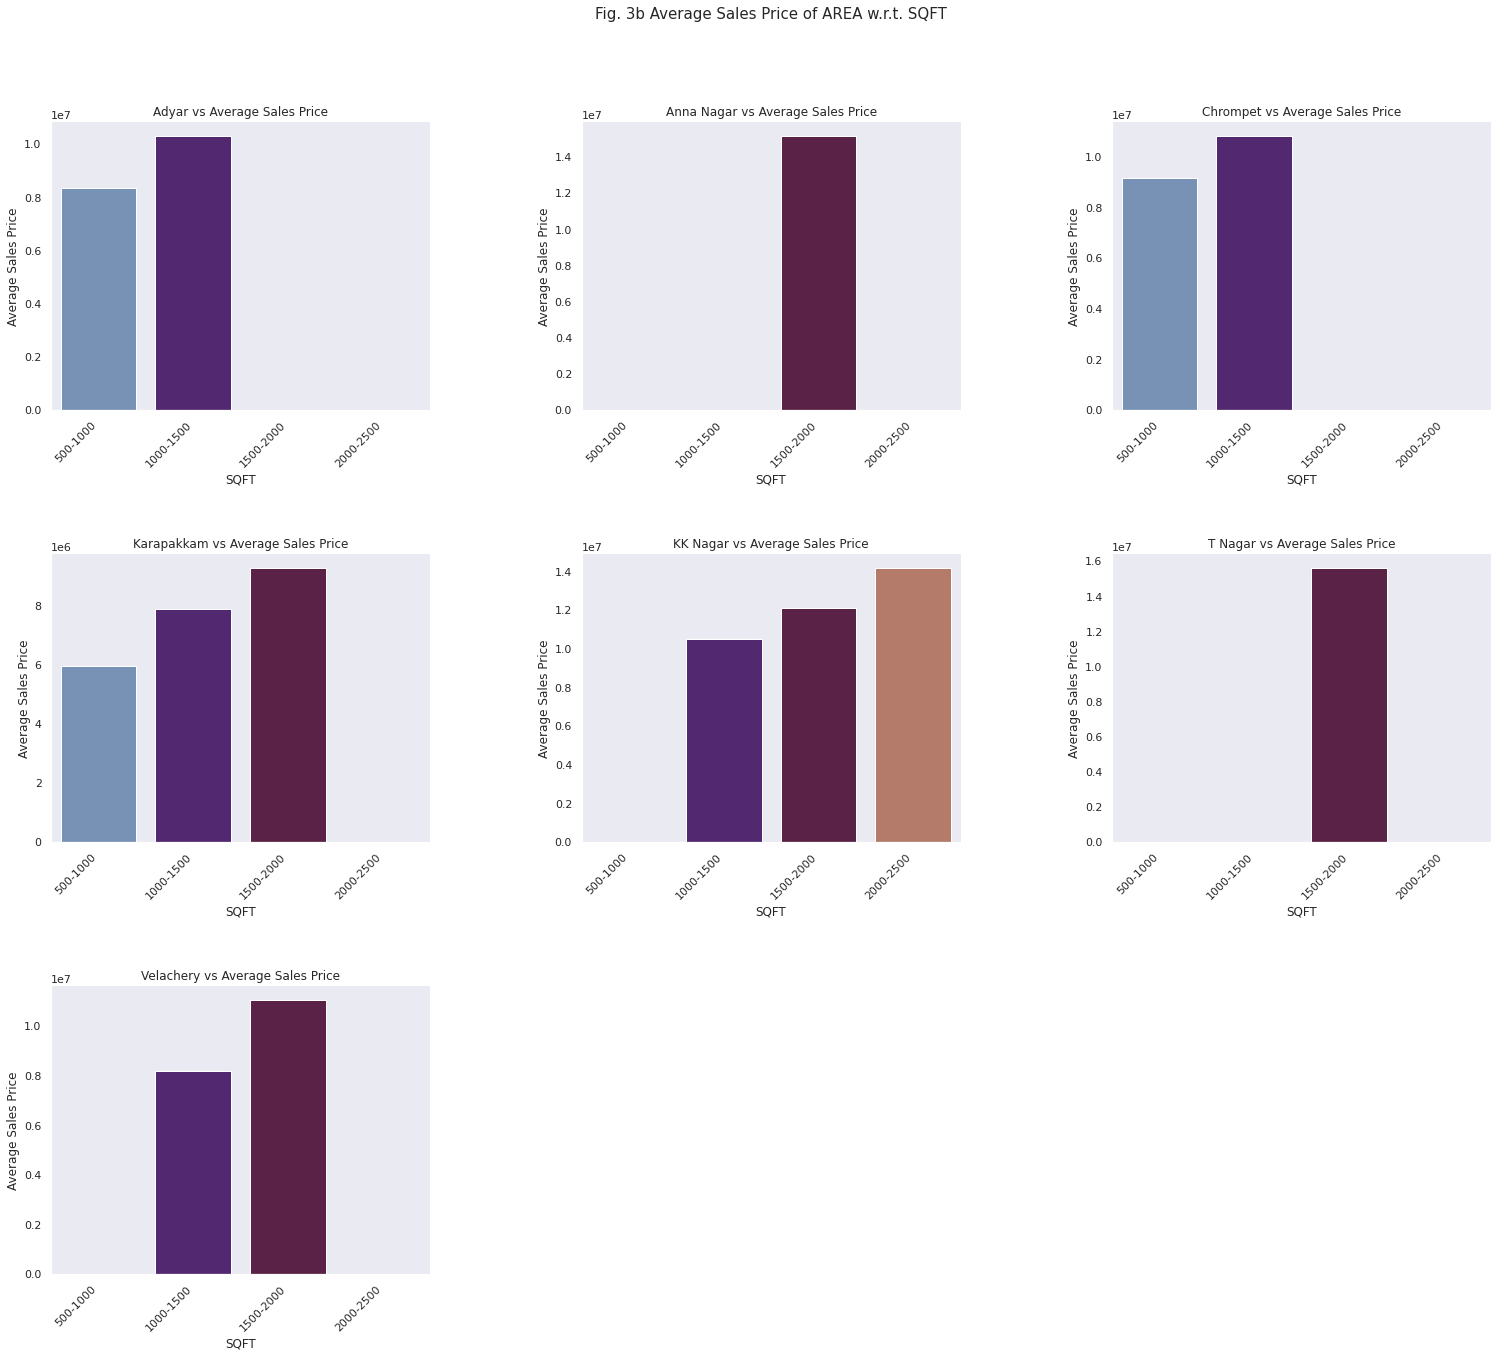

In [175]:
j = 0
plt.figure(figsize = (25,20))
sns.set(style='dark')
plt.suptitle('Fig. 3b Average Sales Price of AREA w.r.t. SQFT', fontsize=15)

for i in ['Adyar', 'Anna Nagar', 'Chrompet', 'Karapakkam', 'KK Nagar', 'T Nagar', 'Velachery']:
  plt.subplot(3,3,j+1)
  result = data_business[data_business['AREA']==i].groupby('sqft_intervals')['SALES_PRICE'].mean().sort_values()
  x = result.index
  y = result.values
  ax = sns.barplot(x, y, palette = 'twilight')
  # sns.lineplot(x,y, marker = 'v')
  plt.xlabel('SQFT')
  plt.ylabel('Average Sales Price')
  plt.title('{} vs Average Sales Price'.format(i))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
  sns.despine()
  j += 1

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)
plt.savefig('3b.jpg', dpi = 400)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


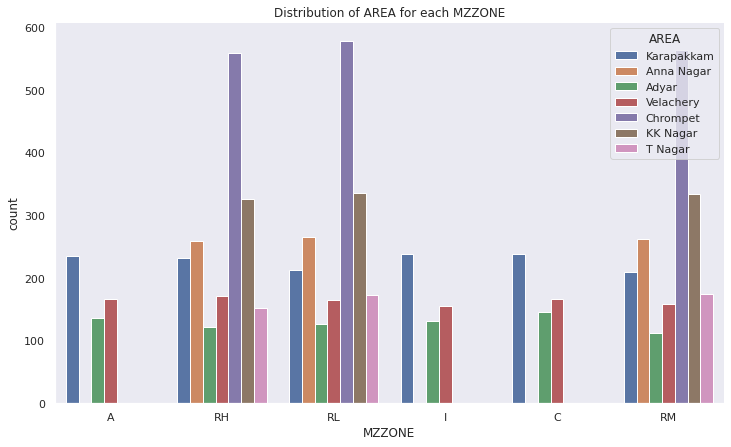

In [176]:
sns.countplot(data_business['MZZONE'], hue = data_business['AREA'])
plt.title('Distribution of AREA for each MZZONE')
sns.despine()

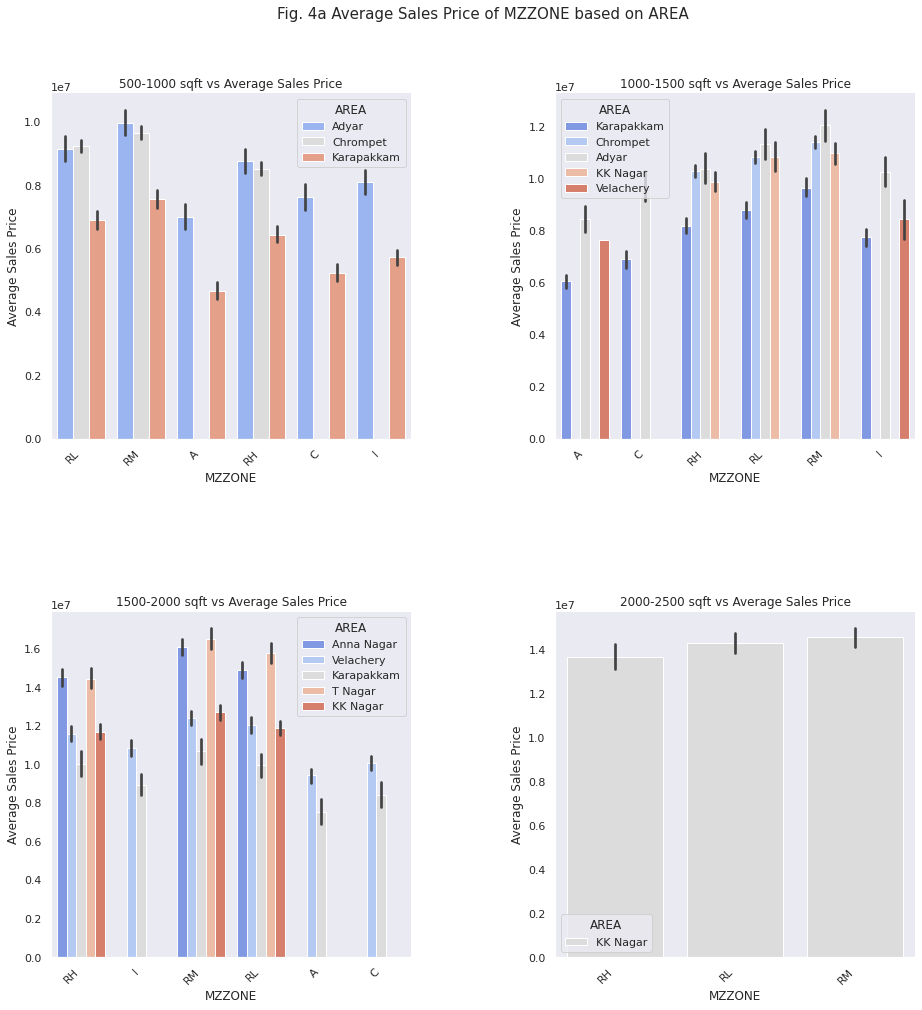

In [178]:
j = 0
plt.figure(figsize = (15,15))
sns.set(style='dark')
plt.suptitle('Fig. 4a Average Sales Price of MZZONE based on AREA', fontsize=15)

for i in ['500-1000', '1000-1500', '1500-2000', '2000-2500']:
  plt.subplot(2,2,j+1)
  ax = sns.barplot(x = 'MZZONE', y = 'SALES_PRICE', hue = 'AREA', 
                   data = data_business[data_business['sqft_intervals']==i], palette = 'coolwarm')
 
  plt.xlabel('MZZONE')
  plt.ylabel('Average Sales Price')
  plt.title('{} sqft vs Average Sales Price'.format(i))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
  sns.despine()
  j += 1

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)
plt.savefig('4a.jpg', dpi = 400)
plt.show()